## Librerias

In [185]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import hdbscan

In [186]:
ran =62

In [187]:
df = pd.read_feather('../data/preprocessed_data.feather')

In [188]:
f_df =df.copy()
total_columns = list(f_df.columns)
columns_to_delete = ['total_area','stratum', 'rooms', 'bathrooms','age', 'fixed_price','id', 'neighbourhood']
total_amenities = [i for i in total_columns if i not in columns_to_delete]    
f_df['total_amenities'] = f_df[total_amenities].sum(axis=1)
f_df

id           neighbourhood   fixed_price  stratum  bathrooms  \
0    10067017                castilla  6.100000e+08      3.0        3.0   
1    10067623       villas de granada  3.200000e+08      3.0        3.0   
2    10068447          cerros de niza  1.190000e+09      6.0        4.0   
3    10072113         prado veraniego  5.850000e+08      3.0        2.0   
4    10076538  santa barbara oriental  1.400000e+09      5.0        3.0   
..        ...                     ...           ...      ...        ...   
972   8220546               chapinero  4.200000e+09      4.0        4.0   
973   8239680     jose joaquin vargas  9.000000e+08      5.0        3.0   
974   8242169              cedro golf  6.800000e+08      4.0        3.0   
975   8244353                 palermo  7.290000e+08      3.0        3.0   
976   8297035               hipotecho  8.950000e+08      3.0        4.0   

         age  rooms  Acceso Pavimentado  Aire Acondicionado  Alarma  ...  \
0       > 30    4.0                   0                   0       0  ...   
1     9 - 15    4.0                   0                   0       0  ...   
2     9 - 15    3.0                   0                   0       0  ...   
3       > 30    3.0                   0                   0       0  ...   
4    16 - 30    7.0                   0                   0       0  ...   
..       ...    ...                 ...                 ...     ...  ...   
972     > 30    6.0                   1                   0       0  ...   
973  16 - 30    3.0                   0                   0       0  ...   
974  16 - 30    5.0                   0                   0       0  ...   
975     > 30    5.0                   0                   0       0  ...   
976     > 30    4.0                   1                   0       0  ...   

     Zona Infantil  Zona Residencial  Zona de BBQ  Zona de Camping  \
0                0                 1            0                0   
1                0                 1            0                0   
2                1                 1            0                0   
3                0                 1            0                0   
4                0                 1            0                0   
..             ...               ...          ...              ...   
972              0                 0            0                0   
973              0                 1            0                0   
974              0                 1            0                0   
975              0                 1            0                0   
976              0                 1            0                0   

     Zona de lavandería  Zonas Verdes  Árboles frutales  Área Urbana  \
0                     1             1                 0            0   
1                     1             1                 0            0   
2                     1             1                 0            0   
3                     0             0                 0            0   
4                     0             0                 0            0   
..                  ...           ...               ...          ...   
972                   0             0                 0            0   
973                   1             0                 0            1   
974                   1             0                 0            0   
975                   1             0                 0            1   
976                   0             0                 0            0   

     total_area  total_amenities  
0         181.0               18  
1         120.0               21  
2         263.0               31  
3         120.0                6  
4         248.0                9  
..          ...              ...  
972       580.0               11  
973       116.0               39  
974       150.0                8  
975       255.0               21  
976       300.0               17  

[977 rows x 163 columns]

In [189]:
df_model = df.copy()

In [190]:
df_model = df_model.drop(['id', 'neighbourhood'], axis=1)

In [191]:
df_model.head()

fixed_price  stratum  bathrooms      age  rooms  Acceso Pavimentado  \
0  6.100000e+08      3.0        3.0     > 30    4.0                   0   
1  3.200000e+08      3.0        3.0   9 - 15    4.0                   0   
2  1.190000e+09      6.0        4.0   9 - 15    3.0                   0   
3  5.850000e+08      3.0        2.0     > 30    3.0                   0   
4  1.400000e+09      5.0        3.0  16 - 30    7.0                   0   

   Aire Acondicionado  Alarma  Alarma Contra Incendio  Alcantarillado  ...  \
0                   0       0                       0               0  ...   
1                   0       0                       0               0  ...   
2                   0       0                       0               0  ...   
3                   0       0                       0               0  ...   
4                   0       0                       0               0  ...   

   Zona Industrial  Zona Infantil  Zona Residencial  Zona de BBQ  \
0                0              0                 1            0   
1                0              0                 1            0   
2                0              1                 1            0   
3                0              0                 1            0   
4                0              0                 1            0   

   Zona de Camping  Zona de lavandería  Zonas Verdes  Árboles frutales  \
0                0                   1             1                 0   
1                0                   1             1                 0   
2                0                   1             1                 0   
3                0                   0             0                 0   
4                0                   0             0                 0   

   Área Urbana  total_area  
0            0       181.0  
1            0       120.0  
2            0       263.0  
3            0       120.0  
4            0       248.0  

[5 rows x 160 columns]

In [192]:
temp_dict_age = {
    '< 1'       : 1,
    '1 - 8'     : 2,
    '9 - 15'    : 3, 
    '16 - 30'   : 4, 
    '> 30'      : 5, 
    'ND'        : 0,    
}

In [193]:
df_model['age'] = df_model['age'].map(temp_dict_age)

In [194]:
df_model['fixed_price'].sort_values(ascending=False)

169    3.300000e+11
875    2.656000e+11
156    1.300000e+10
769    1.200000e+10
866    8.500000e+09
           ...     
225    1.380000e+08
430    1.380000e+08
486    1.290000e+08
919    1.200000e+08
674    1.130000e+08
Name: fixed_price, Length: 977, dtype: float64

## Datasets

In [195]:
df_model['fixed_price'] = df_model['fixed_price']/1000000 # Prices in thousand millions of pesos
df_model['fixed_price'].sort_values(ascending=False)

169    330000.0
875    265600.0
156     13000.0
769     12000.0
866      8500.0
         ...   
225       138.0
430       138.0
486       129.0
919       120.0
674       113.0
Name: fixed_price, Length: 977, dtype: float64

- There is data that is too large for a home's price considering the prices of other homes. When analyzing this houses, its characteristics are fairly standard, so it's believed there may be an error and it's filtered out.

#### Restricción de precios

In [196]:
df_model = df_model[df_model['fixed_price'] <= 6000] #6000

#### Separación del dataframe

In [197]:
def features_target_split(df):
    features = df.drop('fixed_price', axis=1)
    target = df['fixed_price']
    return features, target

In [198]:
df_train, df_pass = train_test_split(df_model, test_size=0.3, random_state=ran)
df_valid, df_test = train_test_split(df_pass, test_size=0.5, random_state=ran)

#### Isolation Forest

In [199]:
features_isolation_array = ['stratum',	'bathrooms','age','rooms', 'total_area']
features_isolation_train = df_train.copy()[features_isolation_array]
clf_forest = IsolationForest(max_samples=100, 
                             max_features=0.9,
                             n_estimators=50,
                             contamination=0.1, # funciona 0.05
                             random_state=ran)
clf_forest.fit(features_isolation_train)

IsolationForest(contamination=0.1, max_features=0.9, max_samples=100,
                n_estimators=50, random_state=62)

In [200]:
def scatterplot_one(df):
    plt.figure(figsize=(15,6))
    sns.scatterplot(df,  
                    x='total_area',
                    y='fixed_price',
                    hue='is_anomaly', 
                    # size='rooms',
                    palette="deep"
                    )
    plt.show()
def pairplot_one(df):
    sns.pairplot(df[['fixed_price','stratum',	'bathrooms','age','rooms', 'total_area', 'is_anomaly']], hue='is_anomaly', palette='magma')
    plt.show()

In [201]:

def anomalies_transformation(df, classificator, has_print=False):
    df_new = df.copy()
    anomalies_detected = classificator.predict(df_new[features_isolation_array])
    df_new['is_anomaly'] = anomalies_detected
    df_new['is_anomaly'] = df_new['is_anomaly'].apply(lambda x: 0 if x == 1 else 1)
    
    print('Total anomalies:' , len(df_new.query('is_anomaly == 1')))
    
    if has_print:
        scatterplot_one(df_new)
        pairplot_one(df_new)
    
    return df_new.query('is_anomaly == 0').drop('is_anomaly', axis=1)

Total anomalies: 16
Total anomalies: 18
Total anomalies: 68


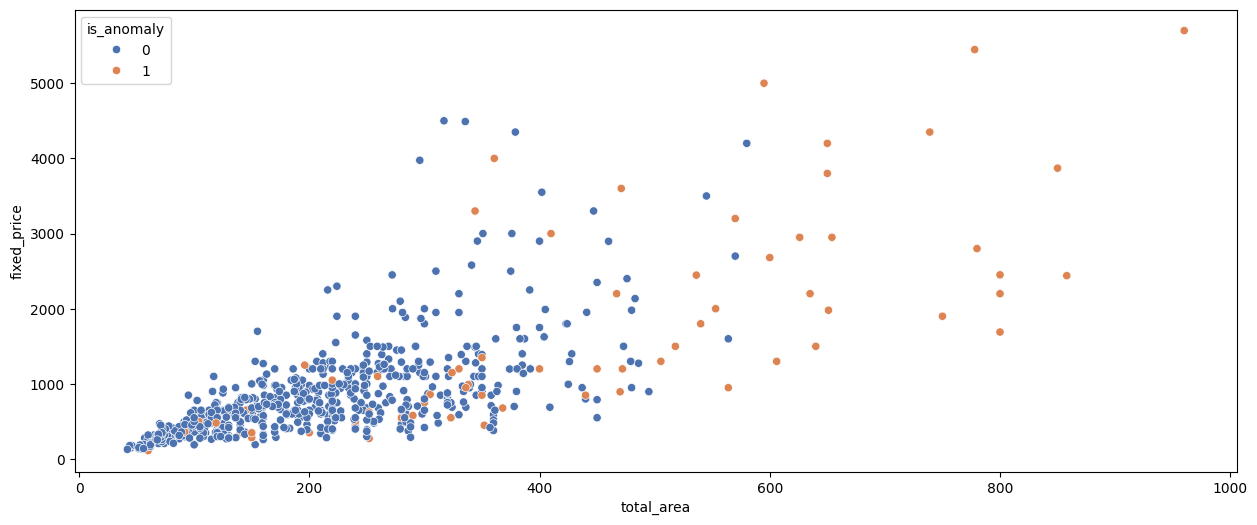

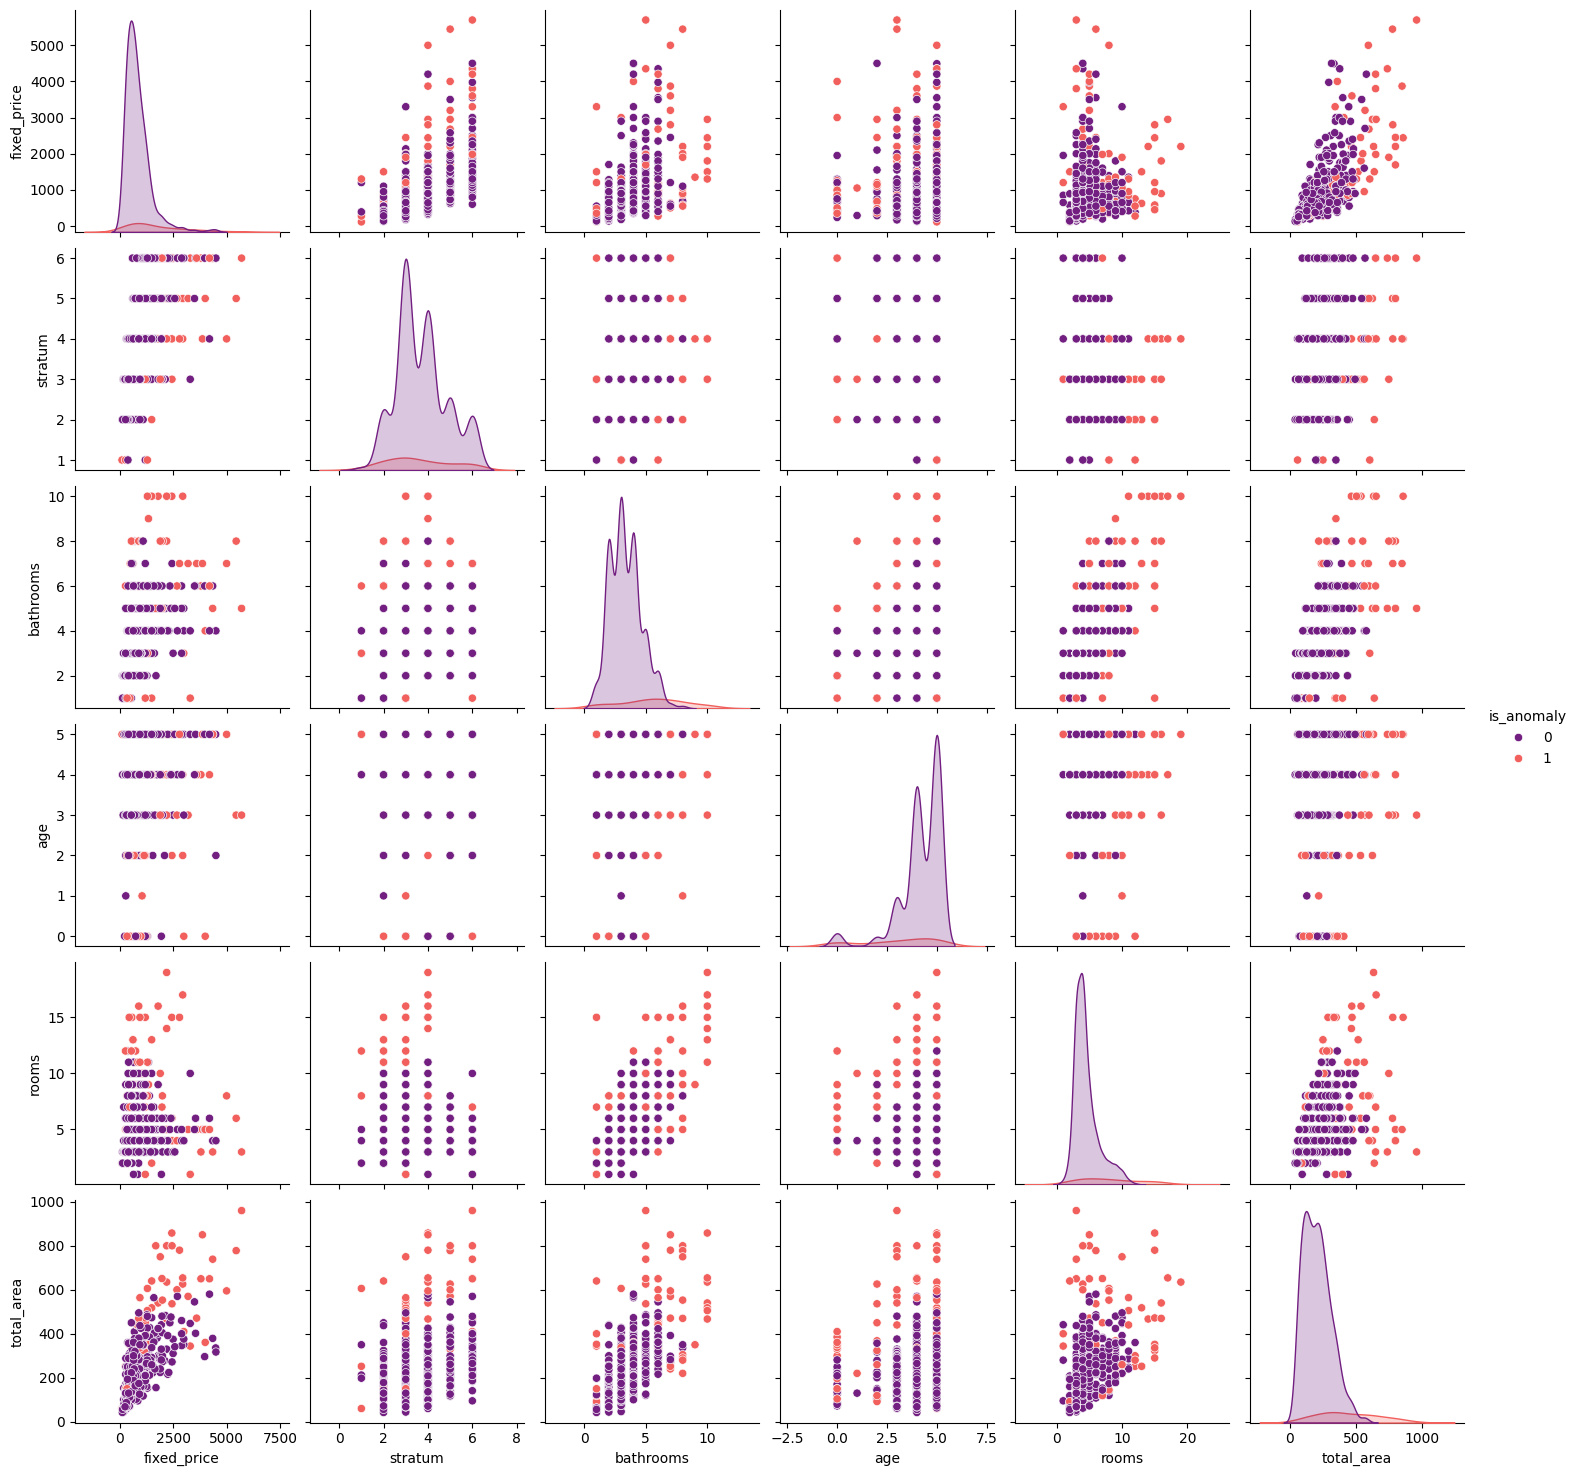

In [202]:
df_valid_isolation = anomalies_transformation(df_valid, clf_forest)
df_test_isolation = anomalies_transformation(df_test, clf_forest)
df_train_isolation = anomalies_transformation(df_train, clf_forest, True)

- Se aislan los datos basados en el isolation forest que se consideran atipicos por sus características. 
- Los datos con precion fijo mayor a 6000 también se aislan puesto que visiblemente estan alejados de los datos principales.

#### DBSCAN clustering

In [203]:
clustering = DBSCAN(eps=7,
                    min_samples=13,
                    # random_state=ran
                    )
clustering.fit_predict(features_isolation_train)
df_cluster = df_train.copy()
predictions = clustering.labels_
df_cluster['is_anomaly'] = predictions

In [204]:
df_cluster['is_anomaly'].value_counts()

is_anomaly
 0    523
-1     74
 1     36
 2     17
 4     13
 3     13
Name: count, dtype: int64

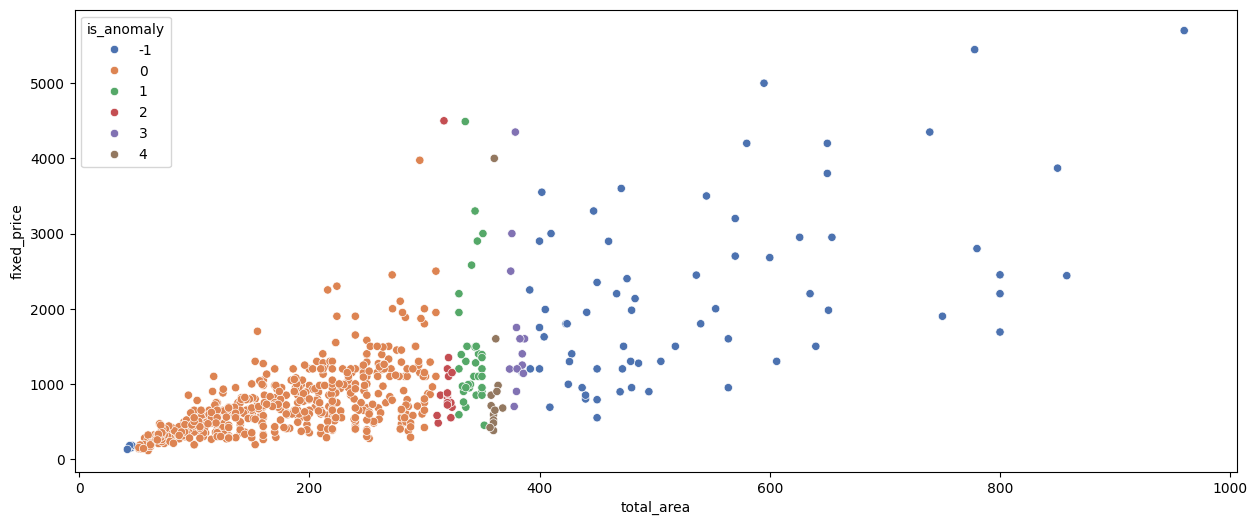

In [205]:
scatterplot_one(df_cluster)

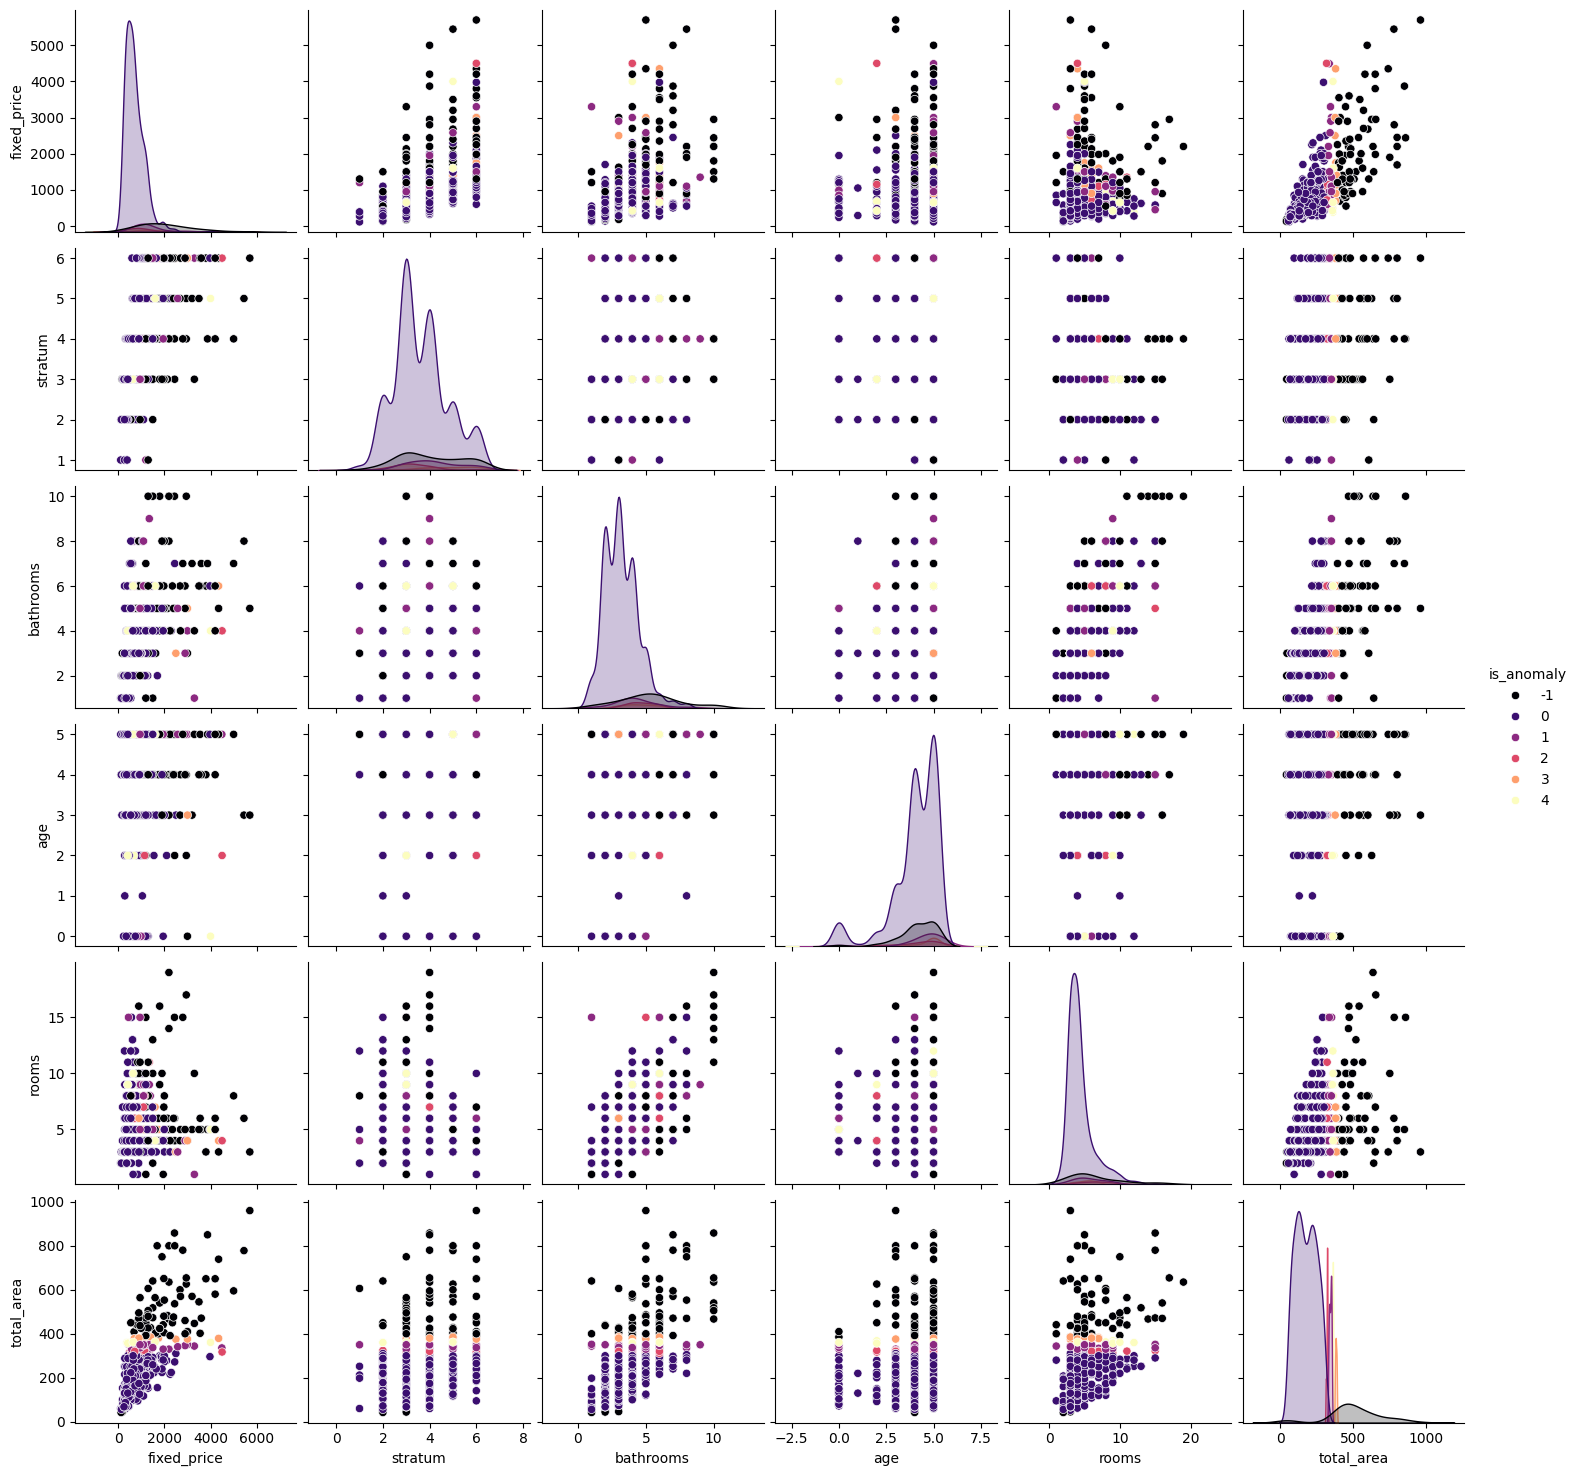

In [206]:
pairplot_one(df_cluster)

- Basado en los cortes observados por el metodo de clustering se decide realizar un datasetet que se adapte solo a las áreas menores a 400m2

In [207]:
df_train_cluster = df_train.copy()
df_train_cluster = df_train_cluster.query('total_area <= 400')
df_valid_cluster = df_valid.copy().query('total_area<=400')

#### HDBSCAN clustering

In [288]:
cluster_hdb = hdbscan.HDBSCAN(min_cluster_size=15, prediction_data=True).fit(features_isolation_train)
df_cluster_hdb_train = df_train.copy()
threshold_hdb= pd.Series(cluster_hdb.outlier_scores_).quantile(0.9)
df_cluster_hdb_train['is_anomaly'] = [1 if i > threshold_hdb else 0 for i in cluster_hdb.outlier_scores_ ]

c:\Users\Gamer2022\Documents\DATA SCIENCE\PROYECTOS VARIOS\house_bogota_price_model\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Gamer2022\Documents\DATA SCIENCE\PROYECTOS VARIOS\house_bogota_price_model\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [289]:
def predict_hdb_anomalies(df, cluster_model_hdb):
    new_df = df.copy()
    features_hdb = new_df[features_isolation_array]
    test_labels, strengths = hdbscan.approximate_predict(cluster_model_hdb, features_hdb)
    new_df['is_anomaly'] = [1 if i == -1 else 0 for i in test_labels ]
    return new_df

In [290]:
df_cluster_hdb_valid = predict_hdb_anomalies(df_valid, cluster_hdb)
df_cluster_hdb_test = predict_hdb_anomalies(df_test, cluster_hdb)

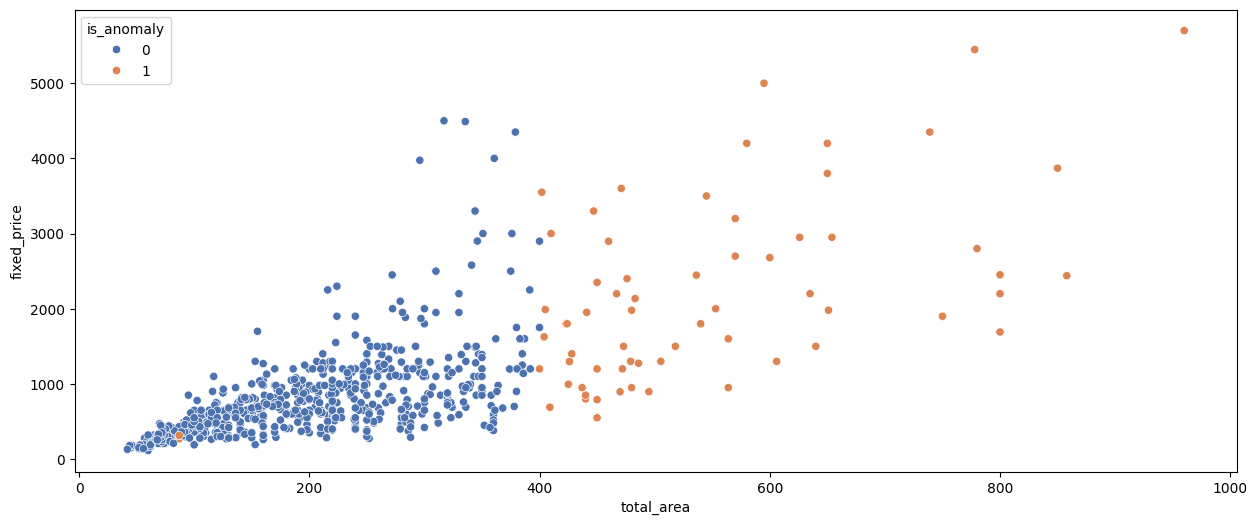

In [291]:
scatterplot_one(df_cluster_hdb_train)

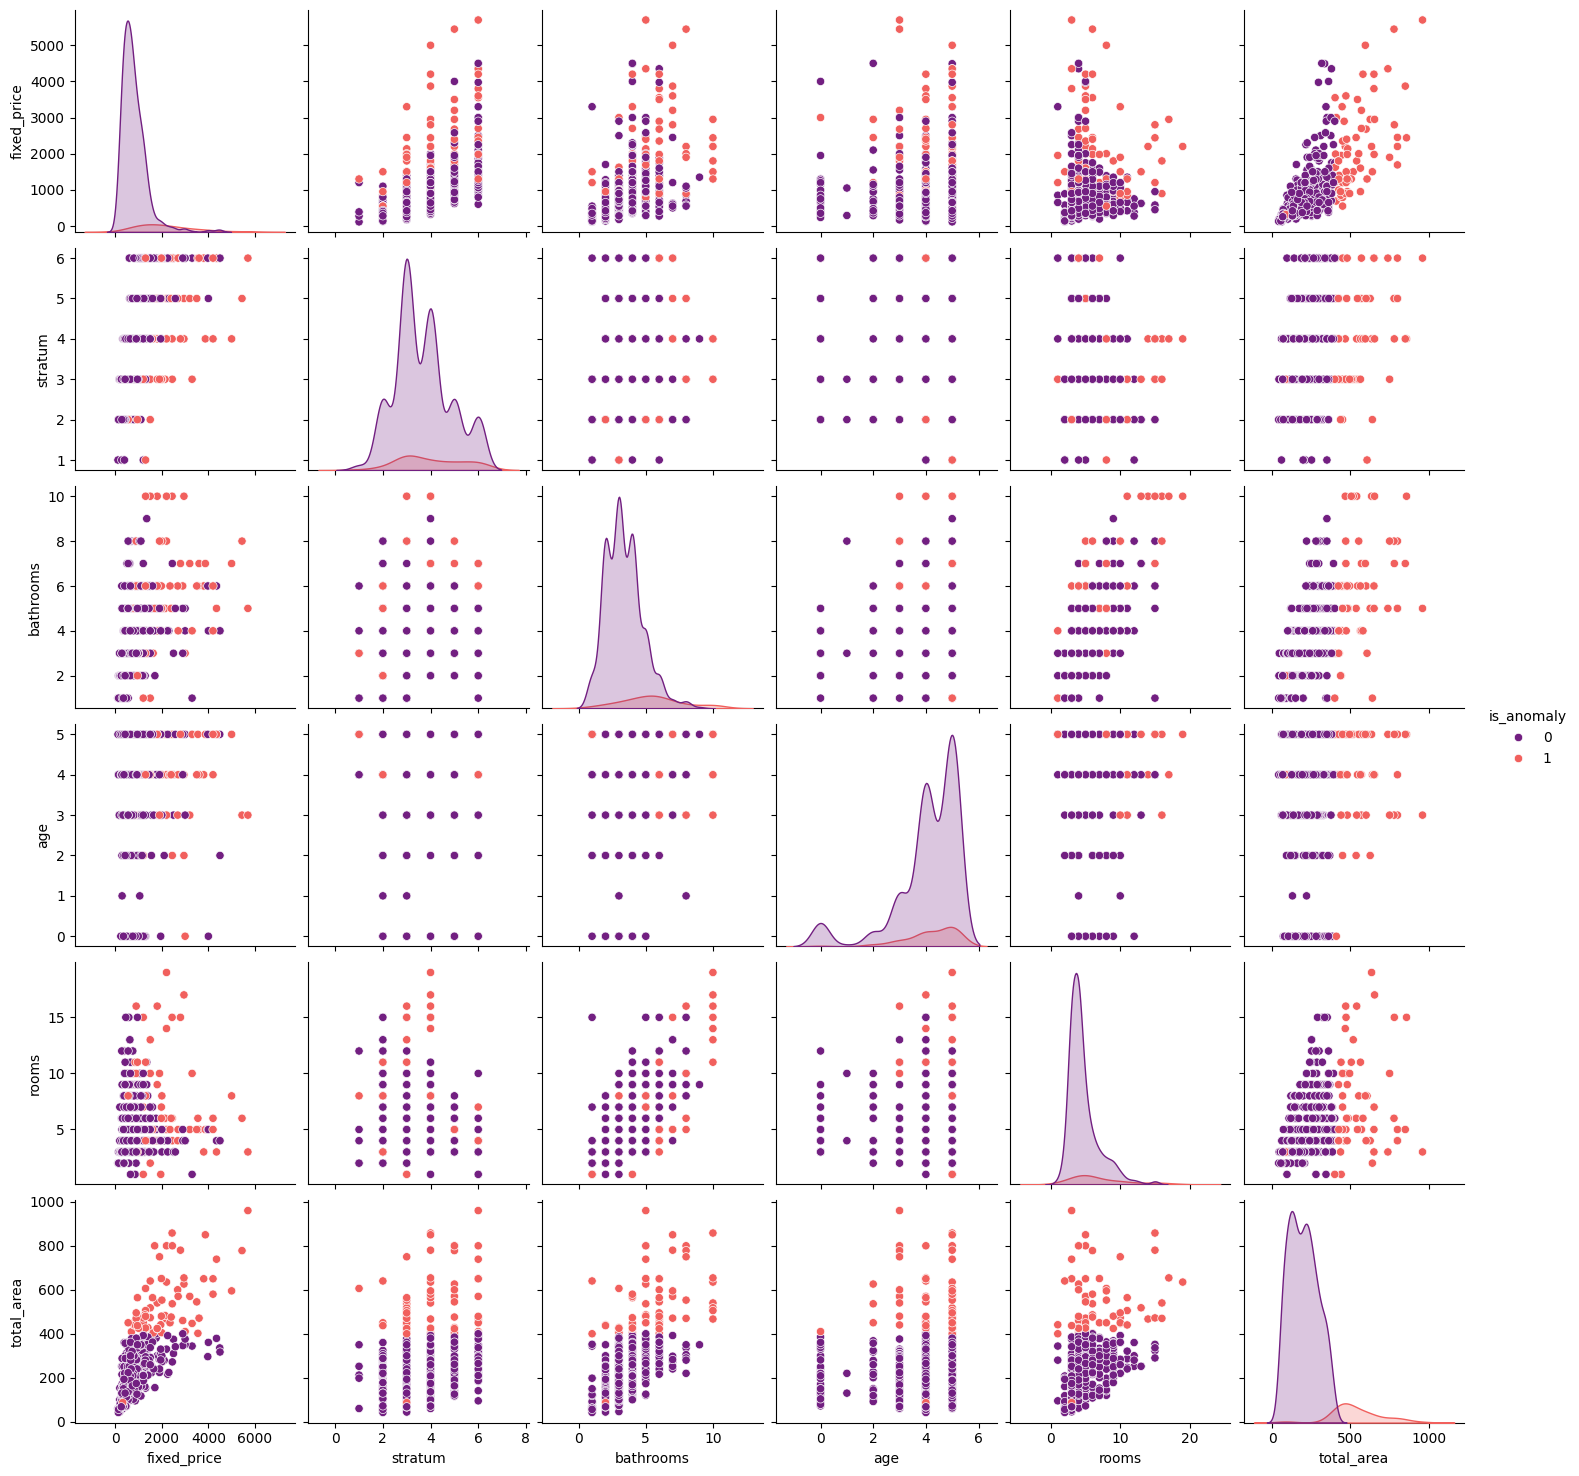

In [292]:
pairplot_one(df_cluster_hdb_train)

In [293]:
df_cluster_hdb_train_drop = df_cluster_hdb_train.query('is_anomaly == 0').drop('is_anomaly', axis=1) 
df_cluster_hdb_valid_drop = df_cluster_hdb_valid.query('is_anomaly == 0').drop('is_anomaly', axis=1) 
df_cluster_hdb_test_drop  = df_cluster_hdb_test.query('is_anomaly == 0').drop('is_anomaly', axis=1)  

#### Local Outlier Factor

In [212]:
clf_lof = LocalOutlierFactor(n_neighbors=5,
                             algorithm='kd_tree',
                            #  leaf_size=2
                            contamination=0.1
                             )

In [213]:
predict_lof = clf_lof.fit_predict(features_isolation_train)
df_lof = df_train.copy()
df_lof['is_anomaly'] = predict_lof

In [214]:
df_lof['is_anomaly'].value_counts()

is_anomaly
 1    608
-1     68
Name: count, dtype: int64

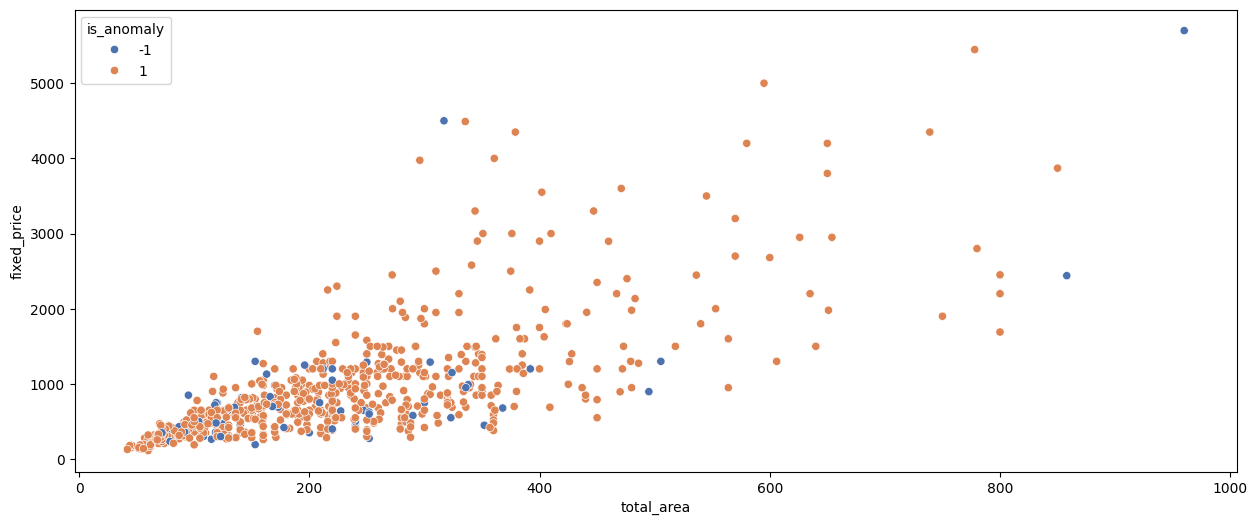

In [215]:
scatterplot_one(df_lof)

#### Escalado de variables

In [216]:
scaler = RobustScaler()
# Escalar todo
scaler.fit(df_train.drop('fixed_price', axis=1))   
df_train_scaled = df_train.copy()

In [217]:
def scaler_transformation(df, scaler):
    df_new = df.copy()
    features_df = df_new.drop('fixed_price', axis=1)
    df_new = pd.DataFrame(scaler.transform(features_df), 
                          columns=features_df.columns,
                          index=features_df.index)
    df_new['fixed_price'] = df['fixed_price']
    return df_new

In [218]:
df_train_scaled = scaler_transformation(df_train, scaler)
df_valid_scaled = scaler_transformation(df_valid, scaler)

#### Selección de características

In [219]:
model_forest_selection = RandomForestRegressor(n_estimators=100,random_state=ran)
features_selection_train, target_selection_train = features_target_split(df_train)
model_forest_selection.fit(features_selection_train, target_selection_train)

data_impotances = {'importances' : model_forest_selection.feature_importances_,
'names' : model_forest_selection.feature_names_in_}
df_importances = pd.DataFrame(data_impotances, columns=['names', 'importances'], )\
                        .sort_values(by='importances', ascending=False)\
                        .reset_index(drop=True)

In [220]:
most_important_features_20 = list(df_importances.loc[0:20,'names'])

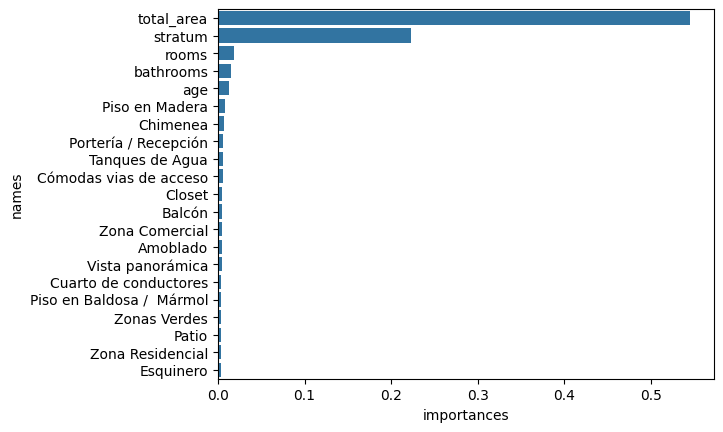

In [221]:
sns.barplot(df_importances.loc[0:20,:], x='importances', y='names')
plt.show()

In [222]:
most_important_features_20.append('fixed_price')

In [223]:
def remove_features_df(df, list_important=most_important_features_20 ):
    df_new = df.copy()
    df_new = df_new[list_important]
    return df_new

In [224]:
df_train_selected_features = remove_features_df(df_train)
df_valid_selected_features = remove_features_df(df_valid)
df_test_selected_features = remove_features_df(df_test)

#### OHE

In [225]:
def ohe_transform(df):
    new_df = df.copy()
    ohe_features = new_df['stratum']
    ohe_features = pd.get_dummies(ohe_features, drop_first=True, dtype=int)
    ohe_features.columns = ['2','3', '4', '5', '6']
    new_df = new_df.drop('stratum', axis=1)
    new_df = pd.concat([new_df, ohe_features], axis=1)
    return new_df

In [226]:
def ohe_transform_valid(df):
    new_df = df.copy()
    ohe_features = new_df['stratum']
    ohe_features = pd.get_dummies(ohe_features, drop_first=True, dtype=int)
    ohe_features.columns = ['3', '4', '5', '6']
    new_df = new_df.drop('stratum', axis=1)
    new_df['2'] = np.full(len(new_df), 0)
    new_df = pd.concat([new_df, ohe_features], axis=1)
    return new_df

#### Caracteristicas nuevas

In [227]:
def create_new_features(df):
    f_df = df.copy()
    total_columns = list(f_df.columns)
    columns_to_delete = ['total_area','stratum', 'rooms', 'bathrooms','age', 'fixed_price']
    total_amenities = [i for i in total_columns if i not in columns_to_delete]    
    f_df['total_amenities'] = f_df[total_amenities].sum(axis=1)
    f_df['area_per_room'] = f_df['total_area'] / f_df['rooms']
    f_df['area_per_bathroom'] = f_df['total_area'] / f_df['bathrooms']
    f_df['area_per_stratum'] = f_df['total_area'] / f_df['stratum']
    f_df['stratum per_rooms'] = f_df['stratum'] / f_df['rooms']
    f_df['age_inverted'] = 1/ ( f_df['age'] +1)
    
    
    return f_df

In [228]:
df_train_new_features = create_new_features(df_train)
df_valid_new_features = create_new_features(df_valid)
df_test_new_features = create_new_features(df_test)
list_new_features = ['total_area','stratum', 'rooms', 'bathrooms','age', 'fixed_price','area_per_room','area_per_bathroom','area_per_stratum','stratum per_rooms','age_inverted','total_amenities' ]
df_train_new_features_removed = remove_features_df(df_train_new_features, list_new_features)
df_valid_new_features_removed = remove_features_df(df_valid_new_features, list_new_features)
df_test_new_features_removed = remove_features_df(df_test_new_features, list_new_features)

#### HDBSCAN + NEW FEATURES

In [295]:
df_hdb_newf_train = remove_features_df(create_new_features(df_cluster_hdb_train_drop), list_new_features)
df_hdb_newf_valid = remove_features_df(create_new_features(df_cluster_hdb_valid_drop), list_new_features)
df_hdb_newf_test = remove_features_df(create_new_features(df_cluster_hdb_test_drop), list_new_features)

## Modelos

#### Funciones

In [229]:
def metrics_eval(target, predictions, dataset_name):
    rmse = root_mean_squared_error(target, predictions)
    mae = mean_absolute_error(target, predictions)
    print(f'Dataset de {dataset_name}')
    print(f'RMSE: {rmse:.2f}')
    print(f'MAE: {mae:.2f}')

In [230]:
def graph_predictions_each_data(target, predictions):
    plt.figure(figsize=(15,6))
    arary_length = np.arange(len(target))
    plt.scatter(arary_length, predictions, marker='*', label='Predictions', s=20, alpha=0.8)
    plt.scatter(arary_length, target, label='Real values', s=20, alpha=0.8)
    plt.title('Price of the observation')
    plt.xlabel('Data number')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

In [231]:
def graph_predictions(target, predictions, ax, title):
    ax.scatter(target, predictions, s=20, alpha=0.8)
    ax.plot([target.min(), target.max()], [target.min(), target.max()], 'r--')
    ax.set_title(title)
    ax.set_xlabel('Valor real')
    ax.set_ylabel('Predicción')
    ax.legend(['Predicciones', 'Línea ideal'])

In [232]:
def model_evaluation(model, df_train, df_valid, model_name):

    f_train, t_train = features_target_split(df_train)
    f_valid, t_valid = features_target_split(df_valid)

    model.fit(f_train, t_train)
    predictions_t = model.predict(f_train)
    predictions_v = model.predict(f_valid)

    print(f"📊 Evaluación del modelo: {model_name}")
    metrics_eval(t_train, predictions_t, 'Entrenamiento')
    metrics_eval(t_valid, predictions_v, 'Validación')

    fig, axs = plt.subplots(1, 2, figsize=(15, 6))
    graph_predictions(t_train, predictions_t, axs[0], 'Entrenamiento')
    graph_predictions(t_valid, predictions_v, axs[1], 'Validación')

    fig.suptitle(f'Comparación de Predicciones - {model_name}', fontsize=16)
    plt.tight_layout()
    plt.show()

### Regresión lineal

📊 Evaluación del modelo: Regresión Lineal
Dataset de Entrenamiento
RMSE: 350.26
MAE: 226.50
Dataset de Validación
RMSE: 603.83
MAE: 365.92


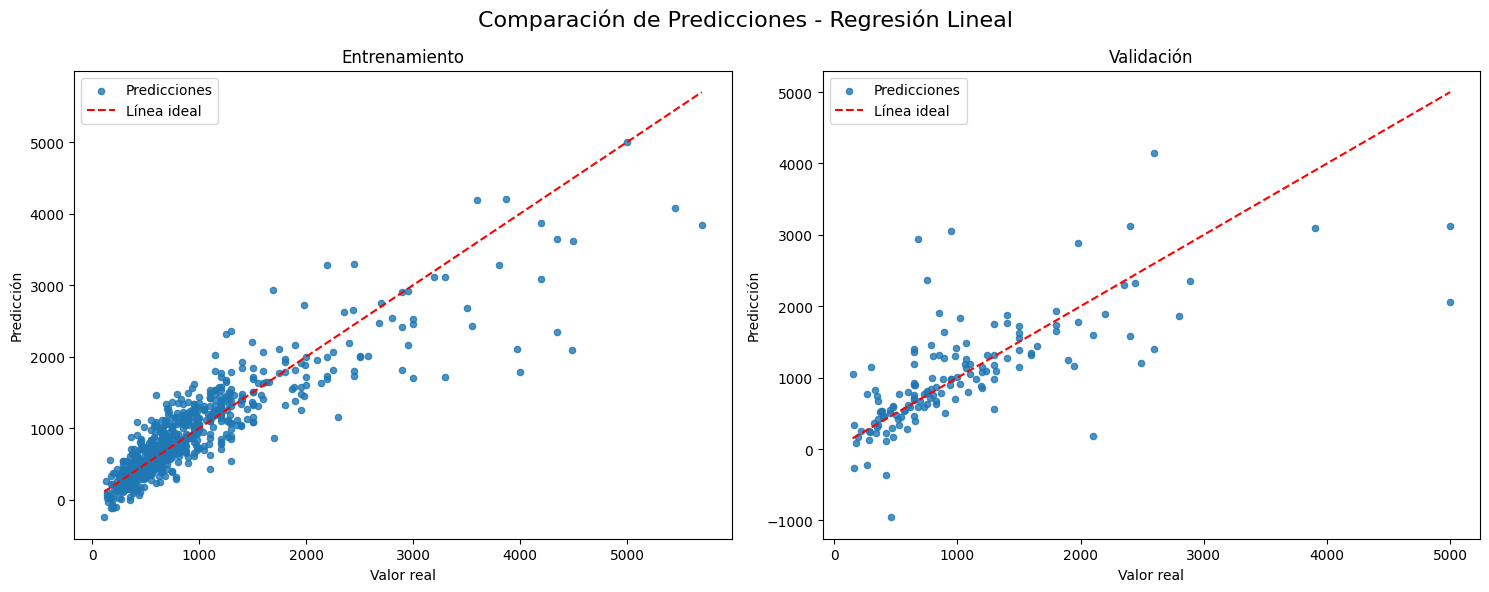

In [233]:
model_linear = LinearRegression()
model_evaluation(model_linear, df_train, df_valid, 'Regresión Lineal')

📊 Evaluación del modelo: Regresión Lineal - Aislado
Dataset de Entrenamiento
RMSE: 300.07
MAE: 192.50
Dataset de Validación
RMSE: 586.67
MAE: 365.43


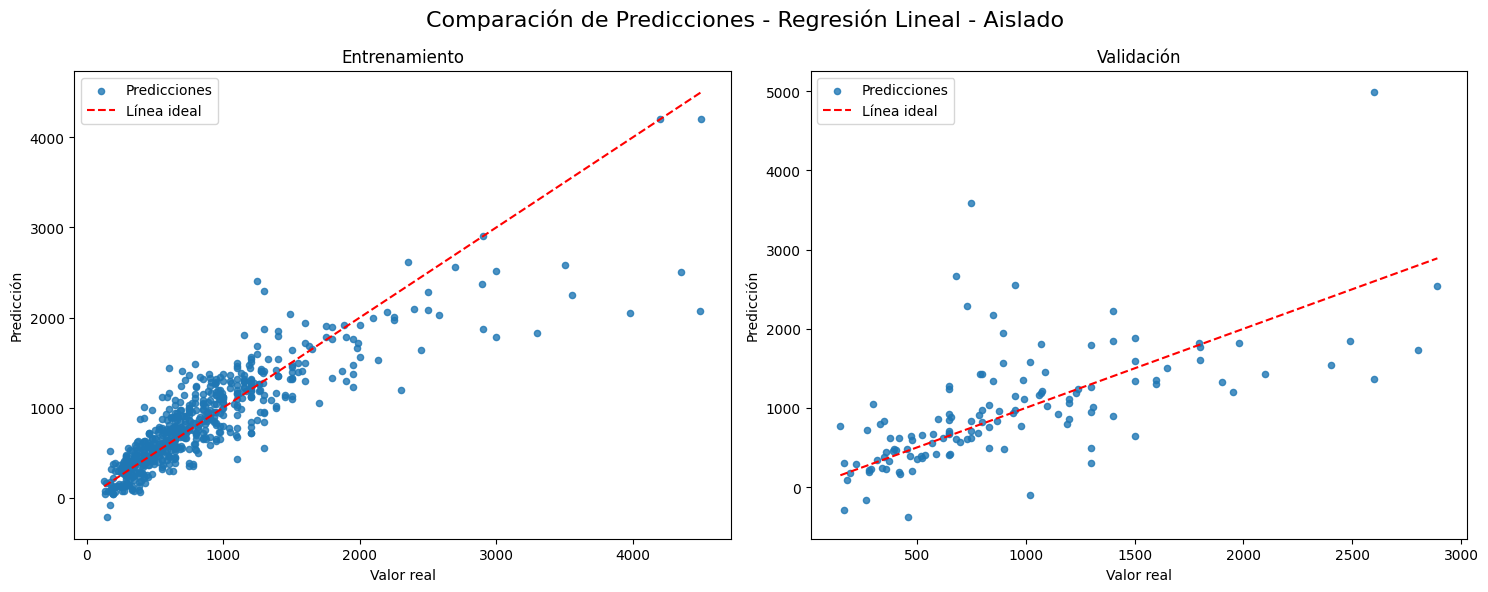

In [234]:
model_evaluation(model_linear, df_train_isolation, df_valid_isolation, 'Regresión Lineal - Aislado')

📊 Evaluación del modelo: Regresión Lineal - DF escalado
Dataset de Entrenamiento
RMSE: 350.26
MAE: 226.50
Dataset de Validación
RMSE: 603.83
MAE: 365.92


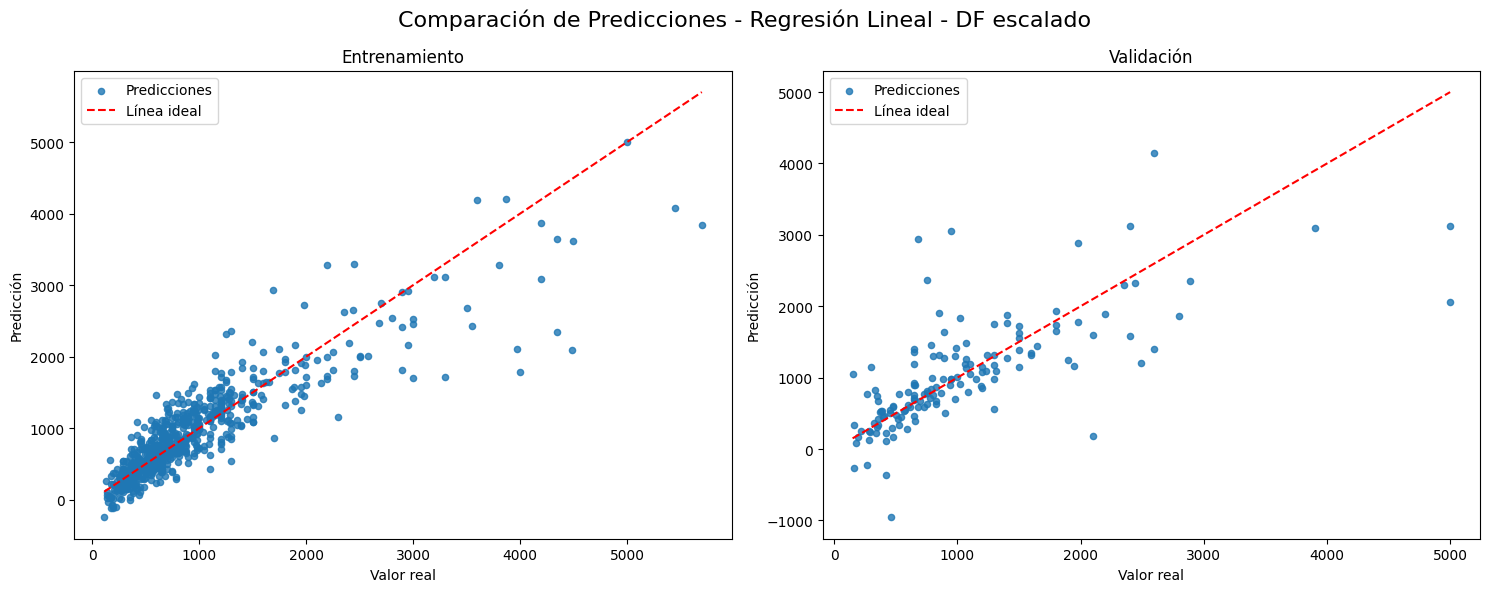

In [235]:
model_evaluation(model_linear, df_train_scaled, df_valid_scaled, 'Regresión Lineal - DF escalado')

📊 Evaluación del modelo: Linear model - Selected features
Dataset de Entrenamiento
RMSE: 412.92
MAE: 264.38
Dataset de Validación
RMSE: 467.67
MAE: 277.00


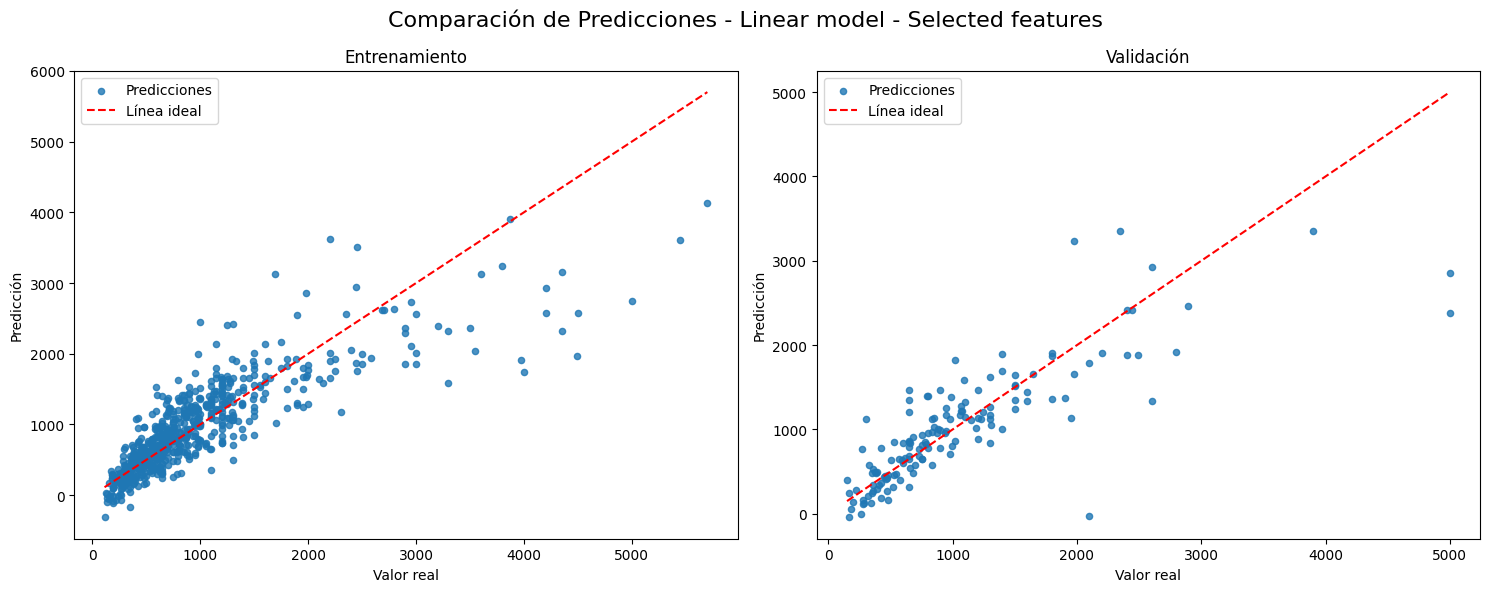

In [236]:
model_evaluation(model_linear, df_train_selected_features, df_valid_selected_features, 'Linear model - Selected features')

📊 Evaluación del modelo: Regresión Lineal - Nuevas caracteristicas
Dataset de Entrenamiento
RMSE: 346.23
MAE: 222.85
Dataset de Validación
RMSE: 601.36
MAE: 364.55


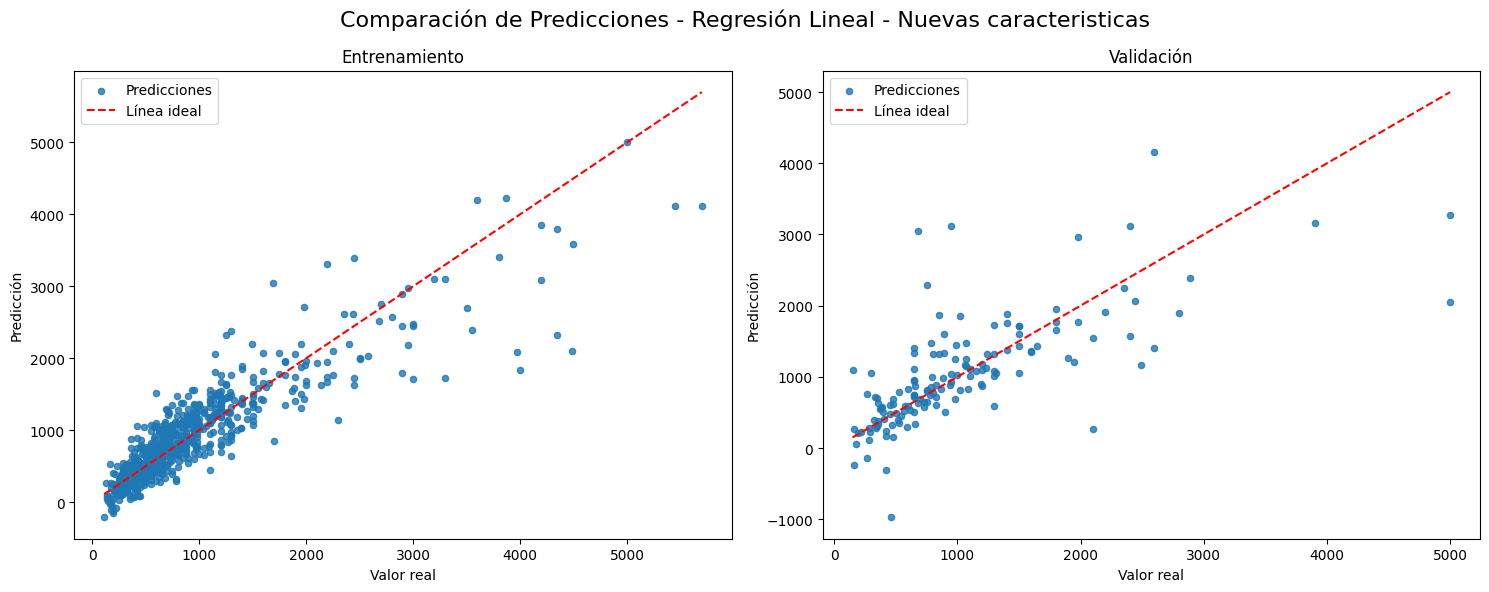

In [237]:
model_evaluation(model_linear, df_train_new_features, df_valid_new_features, 'Regresión Lineal - Nuevas caracteristicas')

📊 Evaluación del modelo: Regresión Lineal - Nuevas caracteristicas
Dataset de Entrenamiento
RMSE: 425.70
MAE: 257.49
Dataset de Validación
RMSE: 459.94
MAE: 269.99


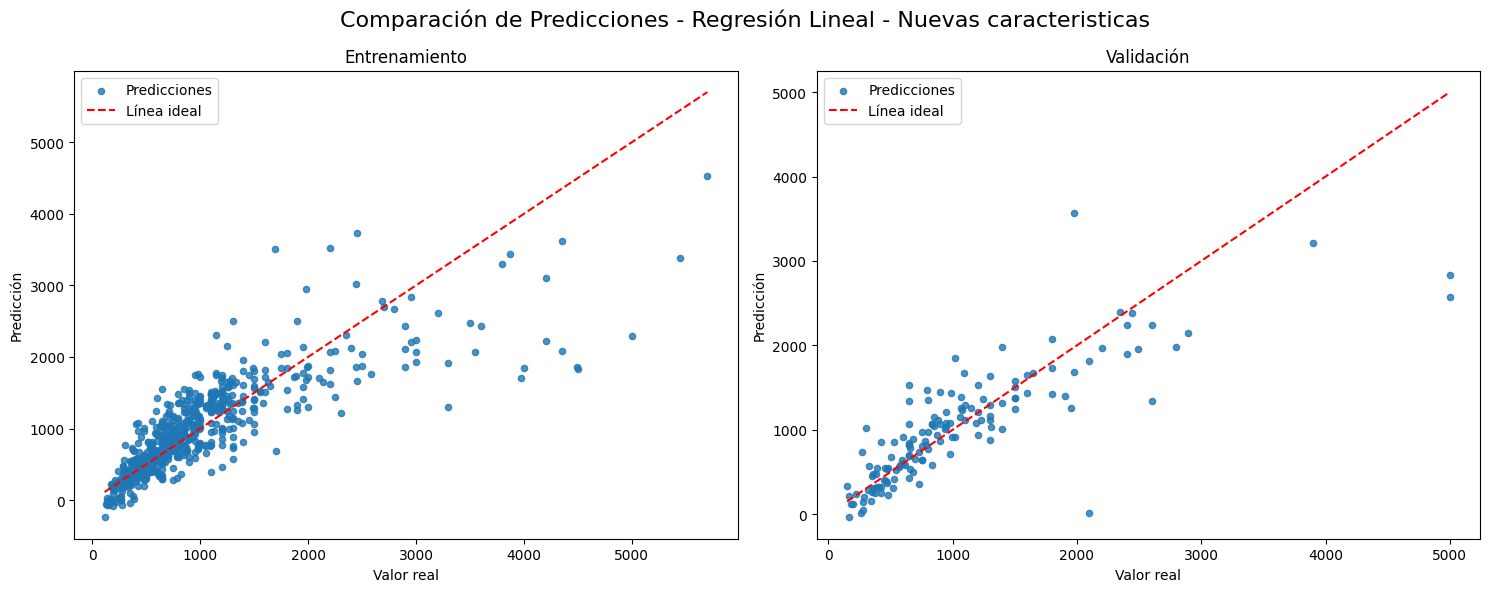

In [238]:
model_evaluation(model_linear, df_train_new_features_removed, df_valid_new_features_removed, 'Regresión Lineal - Nuevas caracteristicas')

### Random Forest

In [239]:
model_forest = RandomForestRegressor(n_estimators=50,
                                     max_depth=20,
                                     max_features=0.9,
                                     min_samples_split=10,
                                     random_state=ran)

📊 Evaluación del modelo: Random Forest
Dataset de Entrenamiento
RMSE: 265.66
MAE: 142.68
Dataset de Validación
RMSE: 410.70
MAE: 242.76


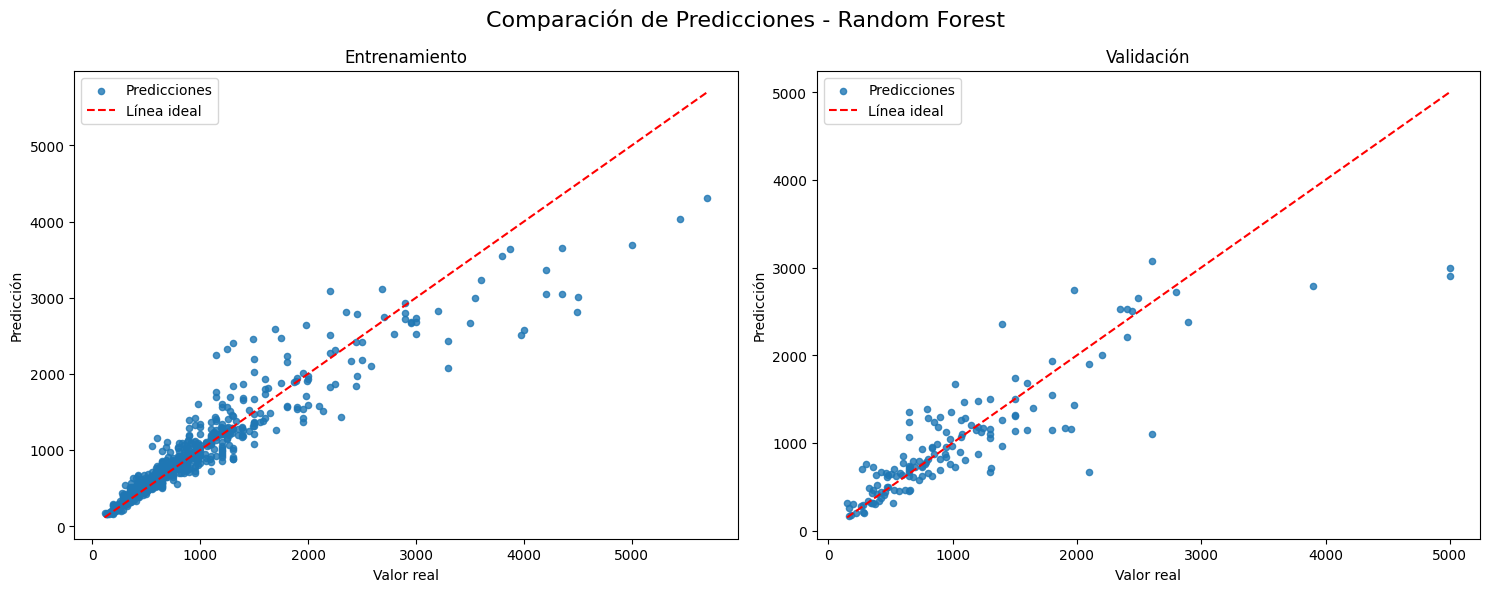

In [240]:
model_evaluation(model_forest, df_train, df_valid, 'Random Forest')

📊 Evaluación del modelo: Random Forest - Isolation
Dataset de Entrenamiento
RMSE: 233.73
MAE: 124.92
Dataset de Validación
RMSE: 297.94
MAE: 193.18


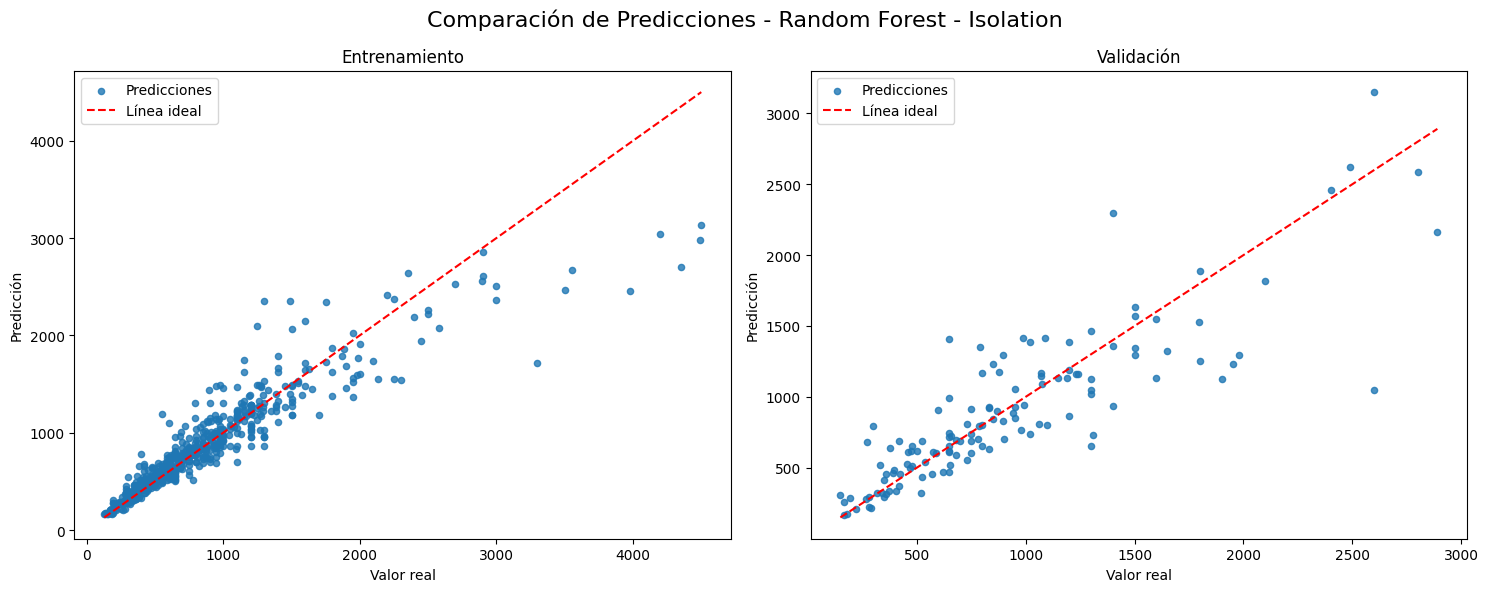

In [241]:
model_evaluation(model_forest, df_train_isolation, df_valid_isolation, 'Random Forest - Isolation')

📊 Evaluación del modelo: Random Forest - Escalado
Dataset de Entrenamiento
RMSE: 265.71
MAE: 142.77
Dataset de Validación
RMSE: 410.64
MAE: 242.56


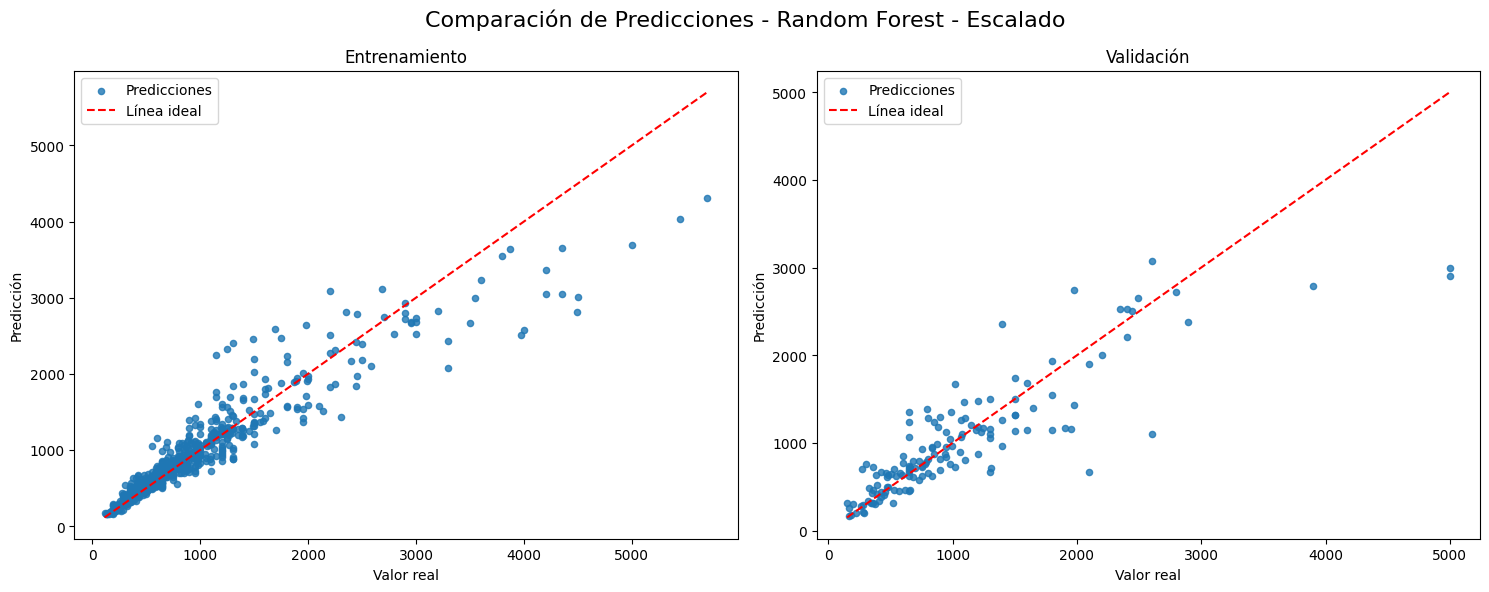

In [242]:
model_evaluation(model_forest, df_train_scaled, df_valid_scaled, 'Random Forest - Escalado')

📊 Evaluación del modelo: Random Forest - Selected features
Dataset de Entrenamiento
RMSE: 276.27
MAE: 152.39
Dataset de Validación
RMSE: 401.12
MAE: 236.62


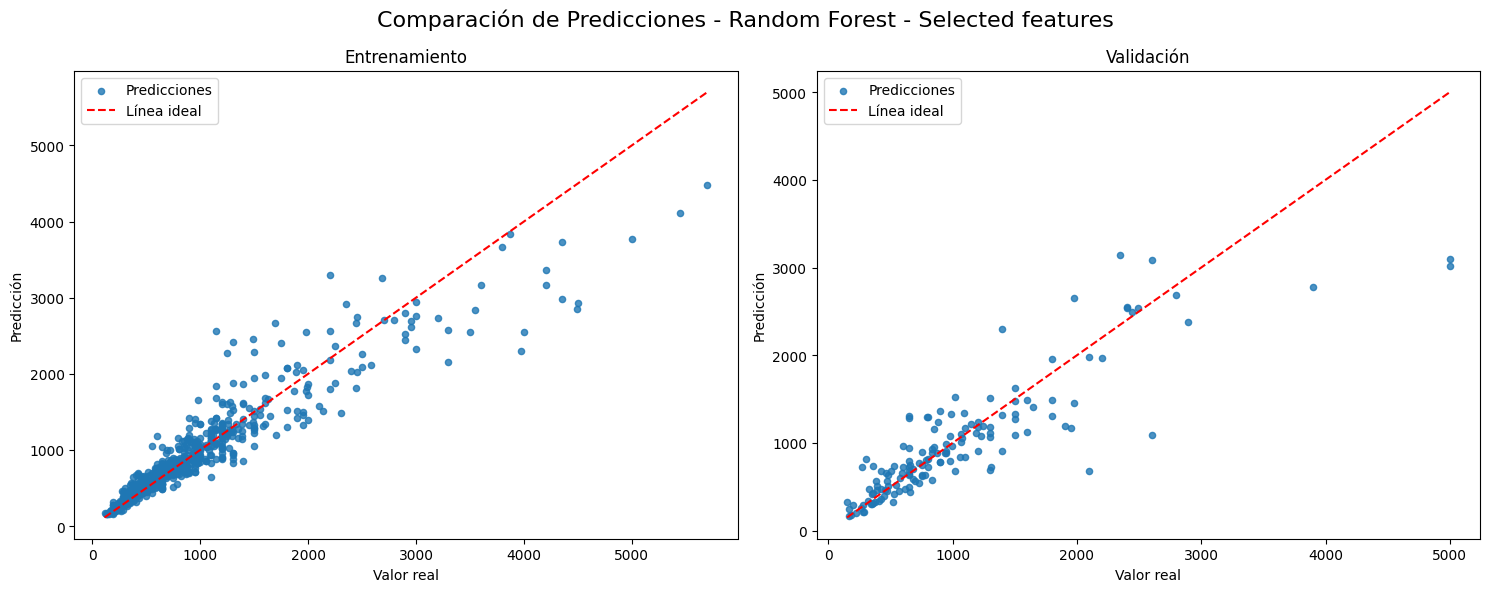

In [243]:
model_evaluation(model_forest, df_train_selected_features, df_valid_selected_features, 'Random Forest - Selected features')

📊 Evaluación del modelo: Random Forest - Nuevas caracteristicas
Dataset de Entrenamiento
RMSE: 257.30
MAE: 137.42
Dataset de Validación
RMSE: 411.12
MAE: 240.62


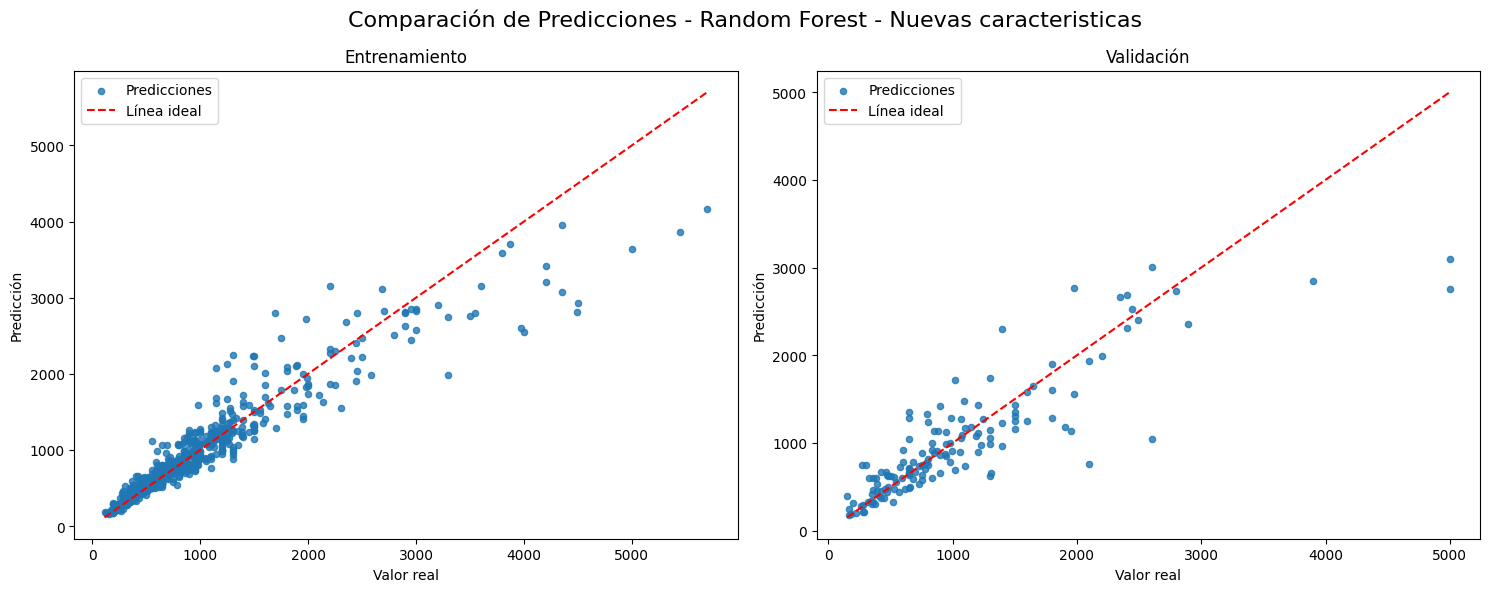

In [244]:
model_evaluation(model_forest, df_train_new_features, df_valid_new_features, 'Random Forest - Nuevas caracteristicas')

📊 Evaluación del modelo: Random Forest - Nuevas caracteristicas
Dataset de Entrenamiento
RMSE: 284.53
MAE: 152.84
Dataset de Validación
RMSE: 436.35
MAE: 247.76


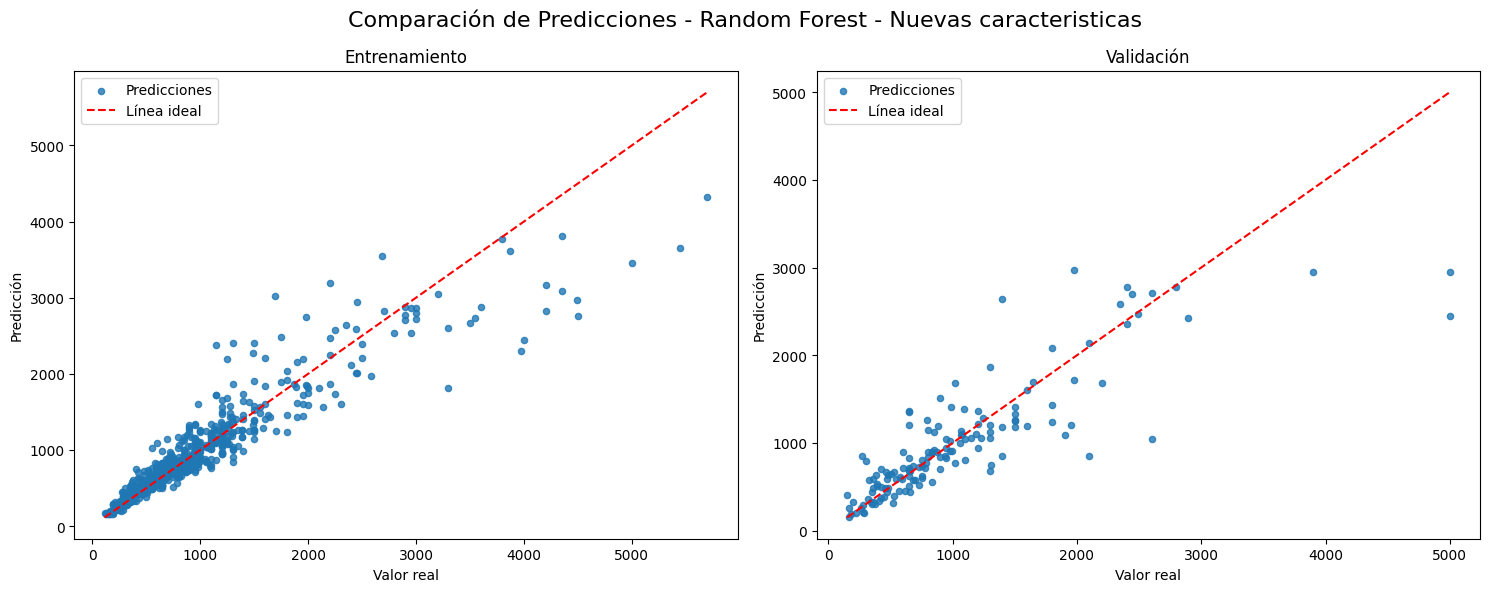

In [245]:
model_evaluation(model_forest, df_train_new_features_removed, df_valid_new_features_removed, 'Random Forest - Nuevas caracteristicas')

### XGBoost

In [246]:
model_xgb = xgb.XGBRegressor(eval_metric='rmse',
                            learning_rate = 0.04, 
                            max_depth=6, 
                            subsample=0.9,
                            colsample_bytree=0.9,
                            n_estimators=70,
                            alpha=0.2,
                            random_state=ran)

📊 Evaluación del modelo: XGBoost
Dataset de Entrenamiento
RMSE: 190.48
MAE: 124.63
Dataset de Validación
RMSE: 464.67
MAE: 263.15


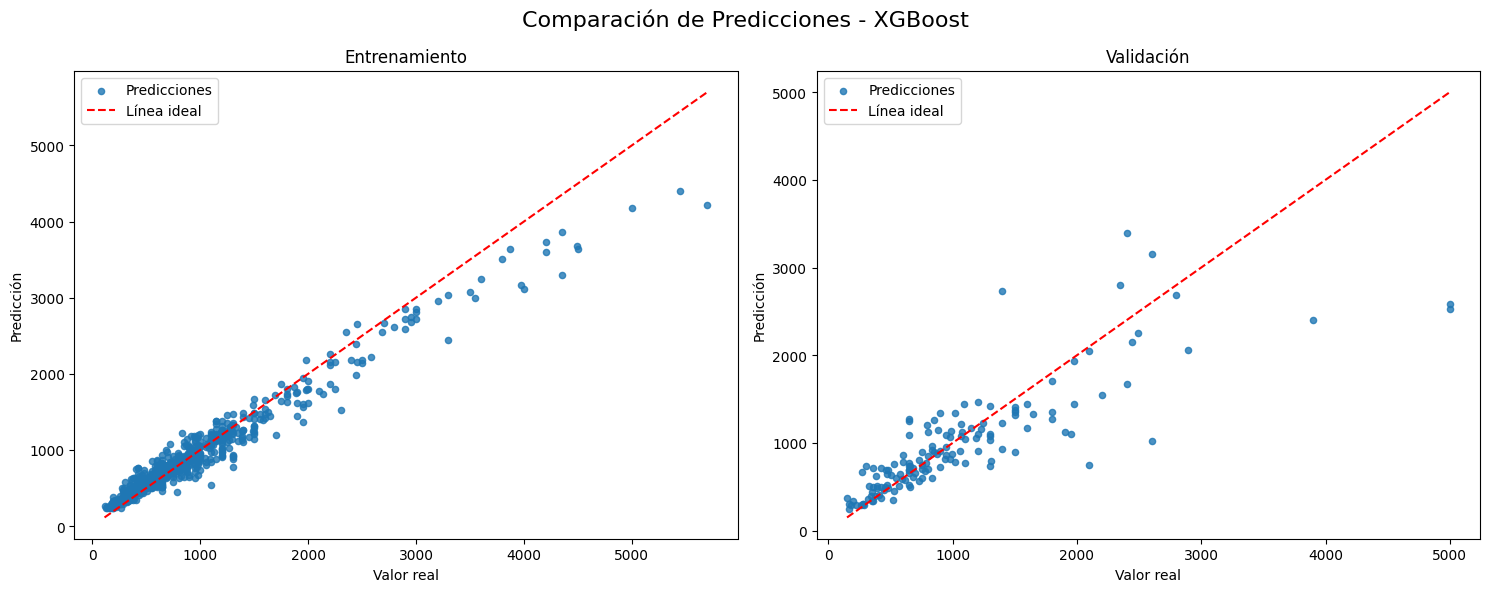

In [247]:
model_evaluation(model_xgb, df_train, df_valid, 'XGBoost')

📊 Evaluación del modelo: XGBoost - Forest Isolation
Dataset de Entrenamiento
RMSE: 157.61
MAE: 106.66
Dataset de Validación
RMSE: 315.72
MAE: 208.44


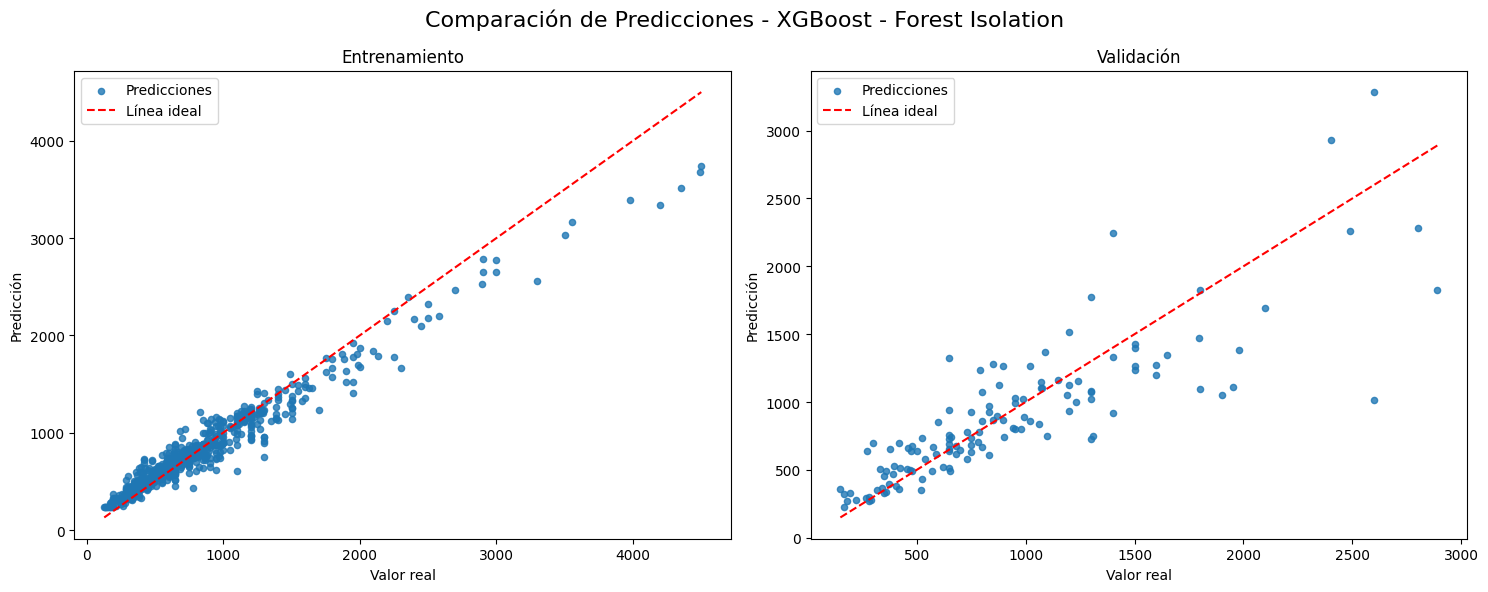

In [248]:
model_evaluation(model_xgb, df_train_isolation, df_valid_isolation, 'XGBoost - Forest Isolation')

📊 Evaluación del modelo: XG-Boost - DF escalado
Dataset de Entrenamiento
RMSE: 190.48
MAE: 124.63
Dataset de Validación
RMSE: 464.67
MAE: 263.15


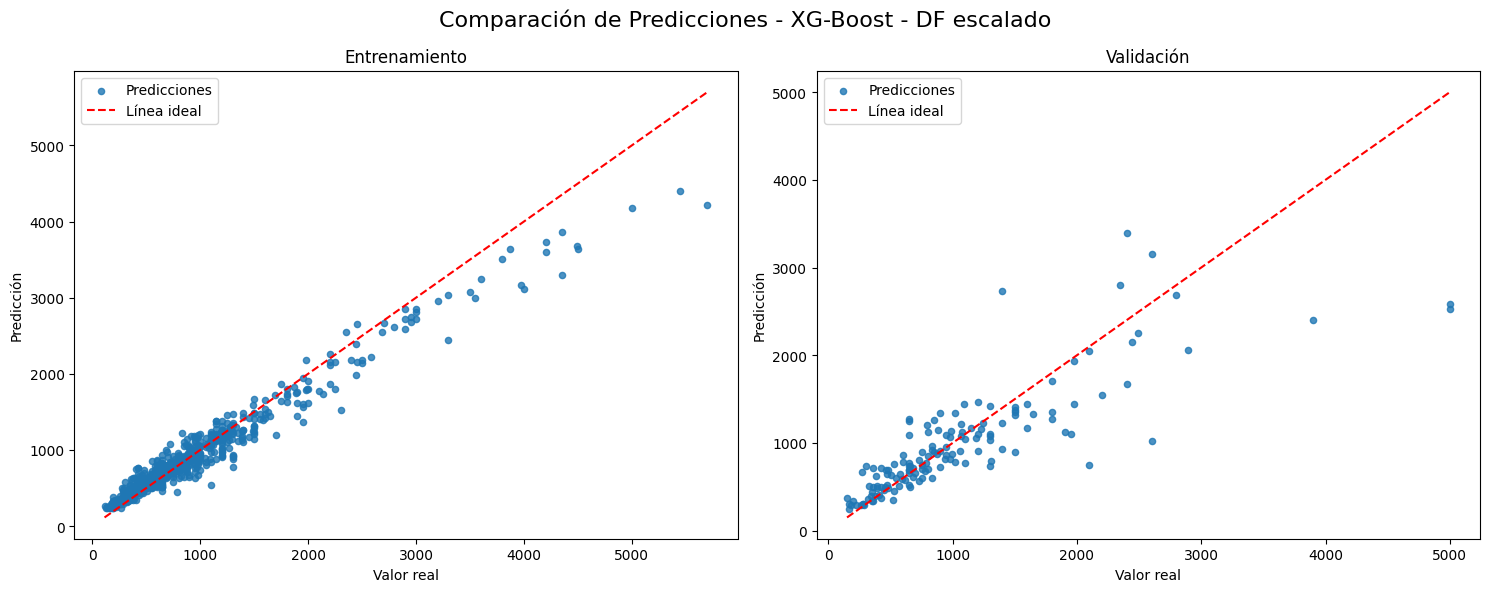

In [249]:
model_evaluation(model_xgb, df_train_scaled, df_valid_scaled, 'XG-Boost - DF escalado')

📊 Evaluación del modelo: XG-Boost - Cluster
Dataset de Entrenamiento
RMSE: 140.63
MAE: 94.68
Dataset de Validación
RMSE: 359.10
MAE: 226.00


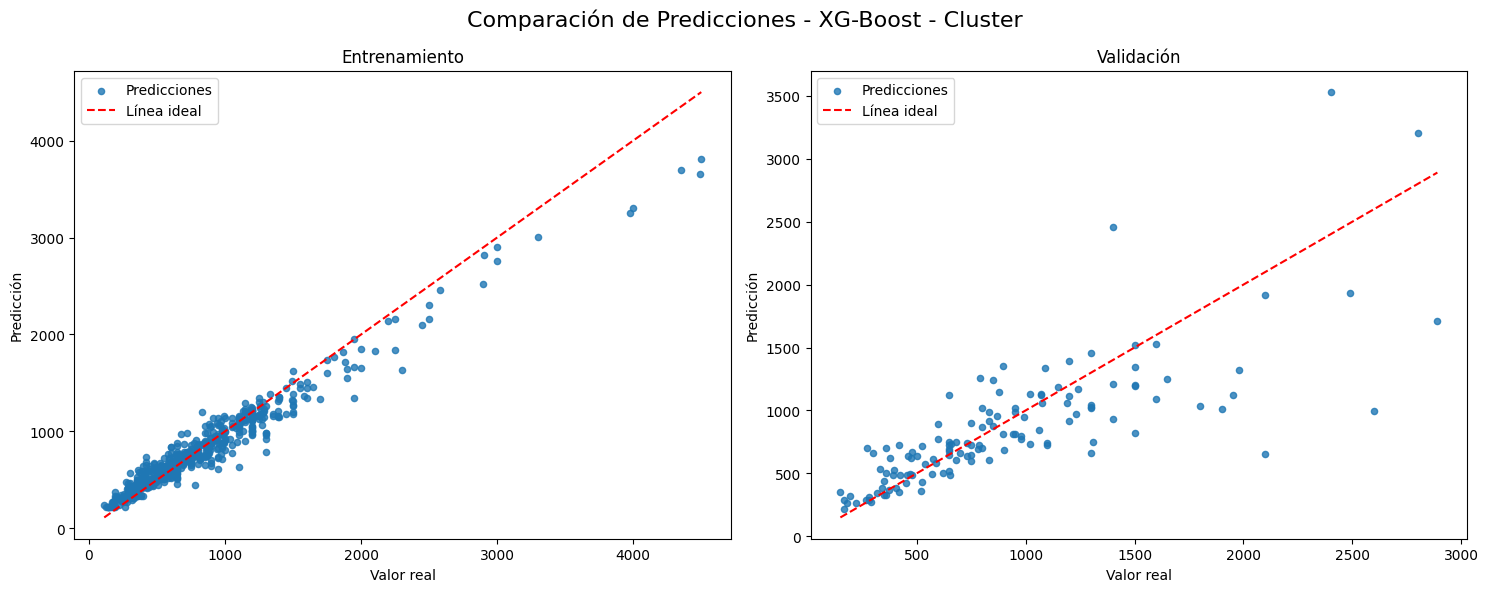

In [250]:
model_evaluation(model_xgb, df_train_cluster, df_valid_cluster, 'XG-Boost - Cluster')

📊 Evaluación del modelo: XG-Boost - Selected features
Dataset de Entrenamiento
RMSE: 207.82
MAE: 135.98
Dataset de Validación
RMSE: 442.41
MAE: 252.14


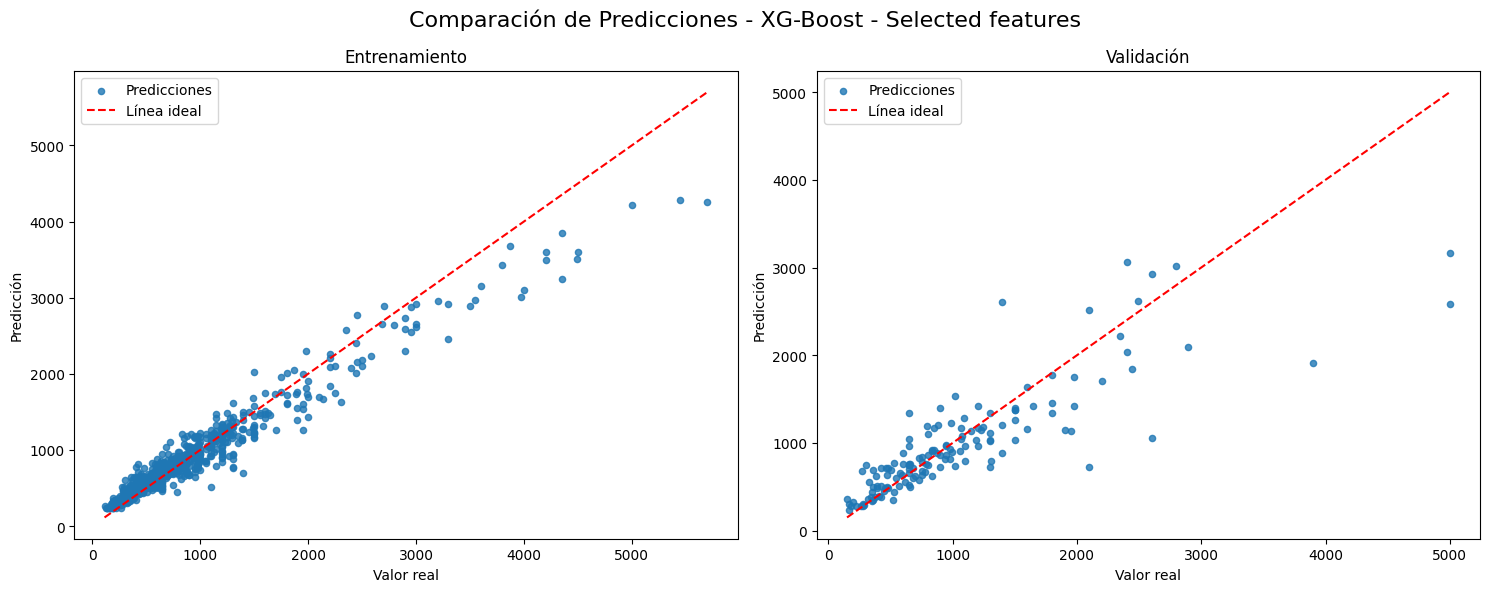

In [251]:
model_evaluation(model_xgb, df_train_selected_features, df_valid_selected_features, 'XG-Boost - Selected features')

📊 Evaluación del modelo: XGBoost - Nuevas caracteristicas
Dataset de Entrenamiento
RMSE: 172.32
MAE: 114.81
Dataset de Validación
RMSE: 478.02
MAE: 275.63


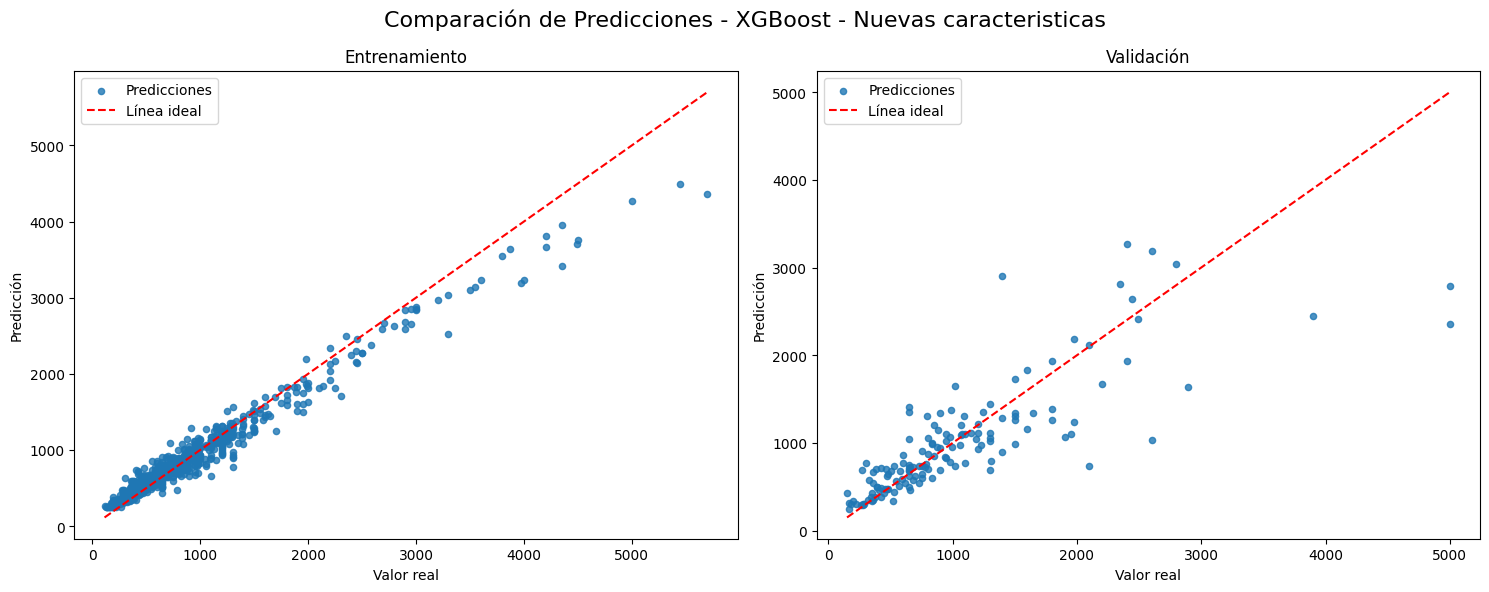

In [252]:
model_evaluation(model_xgb, df_train_new_features, df_valid_new_features, 'XGBoost - Nuevas caracteristicas')

📊 Evaluación del modelo: XGBoost - Nuevas caracteristicas
Dataset de Entrenamiento
RMSE: 194.98
MAE: 126.51
Dataset de Validación
RMSE: 468.04
MAE: 266.03


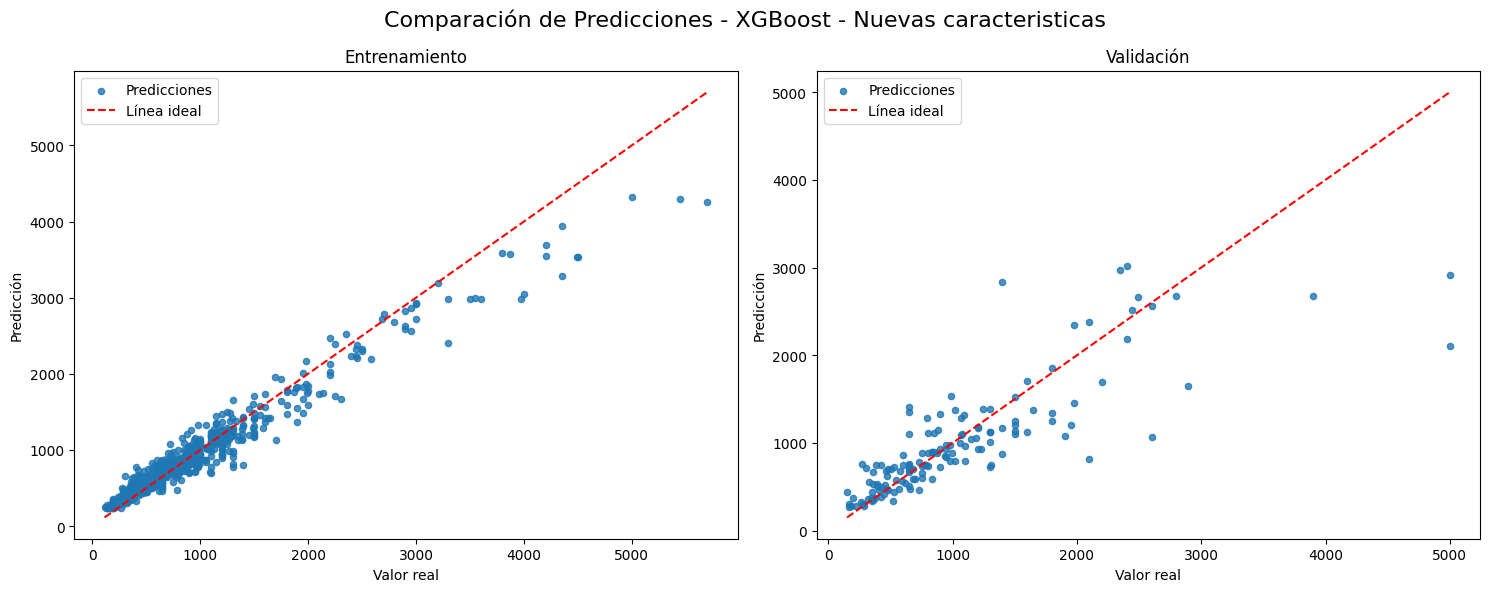

In [253]:
model_evaluation(model_xgb, df_train_new_features_removed, df_valid_new_features_removed, 'XGBoost - Nuevas caracteristicas')

📊 Evaluación del modelo: XGBoost - Cluster HDBSCAN
Dataset de Entrenamiento
RMSE: 139.16
MAE: 94.54
Dataset de Validación
RMSE: 341.06
MAE: 209.99


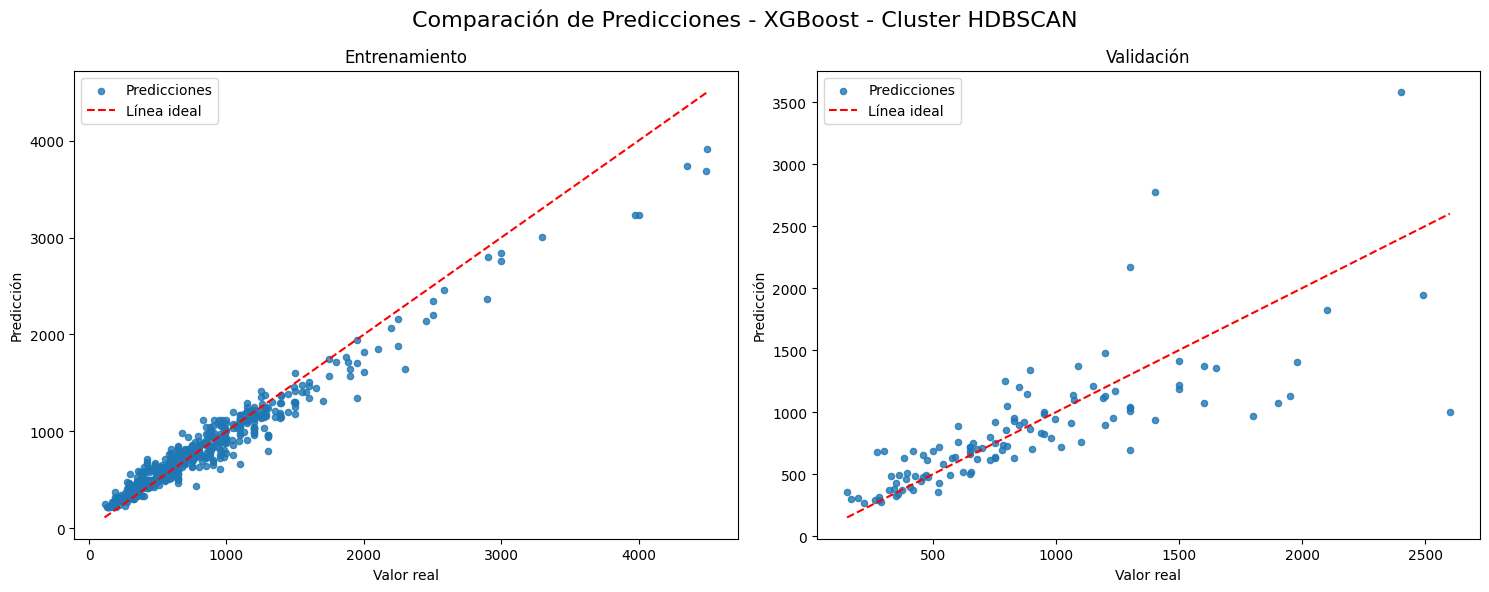

In [294]:
model_evaluation(model_xgb, df_cluster_hdb_train_drop, df_cluster_hdb_valid_drop, 'XGBoost - Cluster HDBSCAN')

📊 Evaluación del modelo: XGBoost - Cluster HDBSCAN + New features
Dataset de Entrenamiento
RMSE: 138.90
MAE: 92.72
Dataset de Validación
RMSE: 308.21
MAE: 198.64


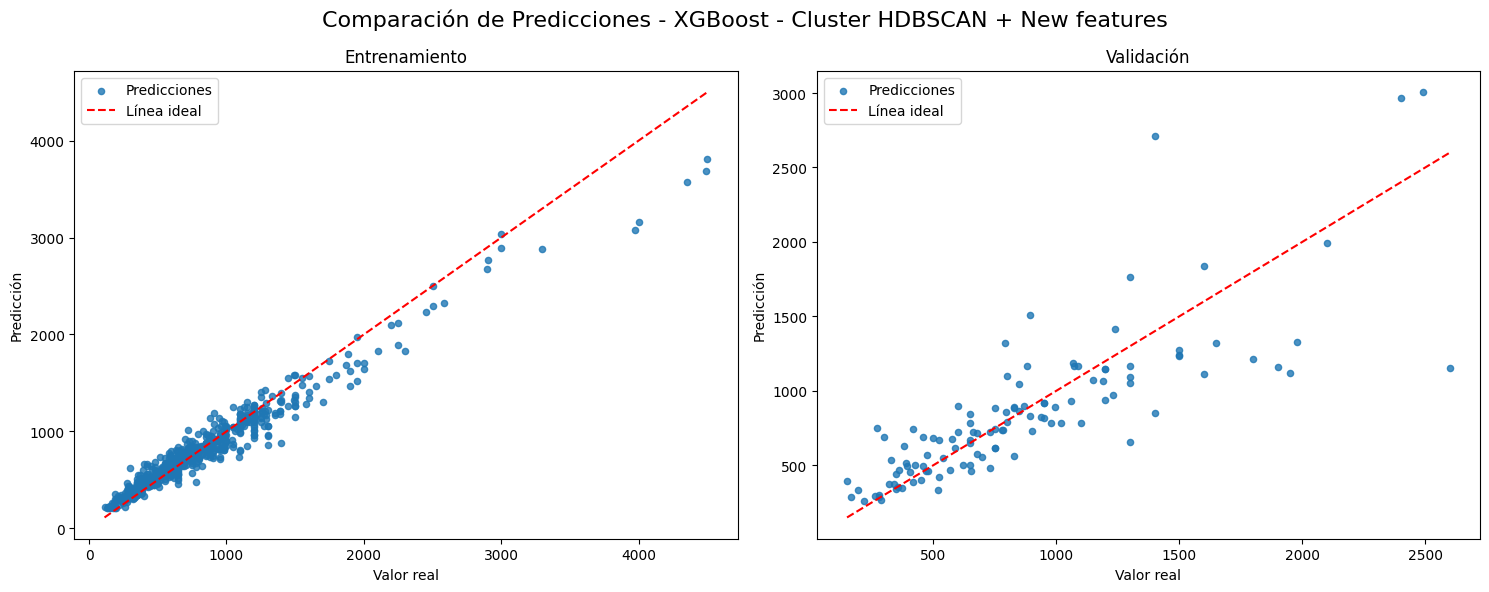

In [296]:
model_evaluation(model_xgb, df_hdb_newf_train, df_hdb_newf_valid, 'XGBoost - Cluster HDBSCAN + New features')

## Optimizacion

In [297]:
df_opt = pd.concat([df_hdb_newf_train, df_hdb_newf_valid], axis=0)
f_opt_nf, t_opt_nf = features_target_split(df_opt)

In [298]:
model_xgb_selected = xgb.XGBRegressor(eval_metric='rmse',
                            random_state=ran)
params = {
    'learning_rate'     : [0.01, 0.04, 0.08], 
    'max_depth'         : [3, 6, 12], 
    'subsample'         : [0.5, 0.9],
    'colsample_bytree'  : [0.5, 0.9],
    'n_estimators'      : [50, 70, 100],
    'alpha'             : [0.2, 1],
}
grid_search = GridSearchCV(estimator=model_xgb_selected,
                           param_grid=params,
                           verbose=3,
                           scoring= 'neg_mean_absolute_error', 
                           cv=3,)

In [299]:
grid_search.fit(f_opt_nf, t_opt_nf )

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV 1/3] END alpha=0.2, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.5;, score=-295.873 total time=   0.0s
[CV 2/3] END alpha=0.2, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.5;, score=-299.297 total time=   0.0s
[CV 3/3] END alpha=0.2, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.5;, score=-288.352 total time=   0.0s
[CV 1/3] END alpha=0.2, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.9;, score=-292.727 total time=   0.0s
[CV 2/3] END alpha=0.2, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.9;, score=-298.371 total time=   0.0s
[CV 3/3] END alpha=0.2, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.9;, score=-286.387 total time=   0.0s
[CV 1/3] END alpha=0.2, colsample_bytree=0.5, learning_rate=0

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False,
                                    eval_metric='rmse', feature_types=None,
                                    feature_weights=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=No...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'alpha': [0.2, 1], 'colsample_bytree': [0.5, 0.9],
                         'learning_rate': [0.01, 0.04, 0.08],
                         'max_depth': [3, 6, 12], 'n_estimators': [50, 70, 100],
                         'subsample': [0.5, 0.9]},
             scoring='neg_mean_absolute_error', verbose=3)

In [300]:
best_xgb = grid_search.best_estimator_

In [301]:
grid_search.best_params_

{'alpha': 1,
 'colsample_bytree': 0.9,
 'learning_rate': 0.04,
 'max_depth': 3,
 'n_estimators': 100,
 'subsample': 0.9}

📊 Evaluación del modelo: XGBoost - Cluster HDBSCAN + New features
Dataset de Entrenamiento
RMSE: 232.33
MAE: 148.69
Dataset de Validación
RMSE: 301.02
MAE: 192.76


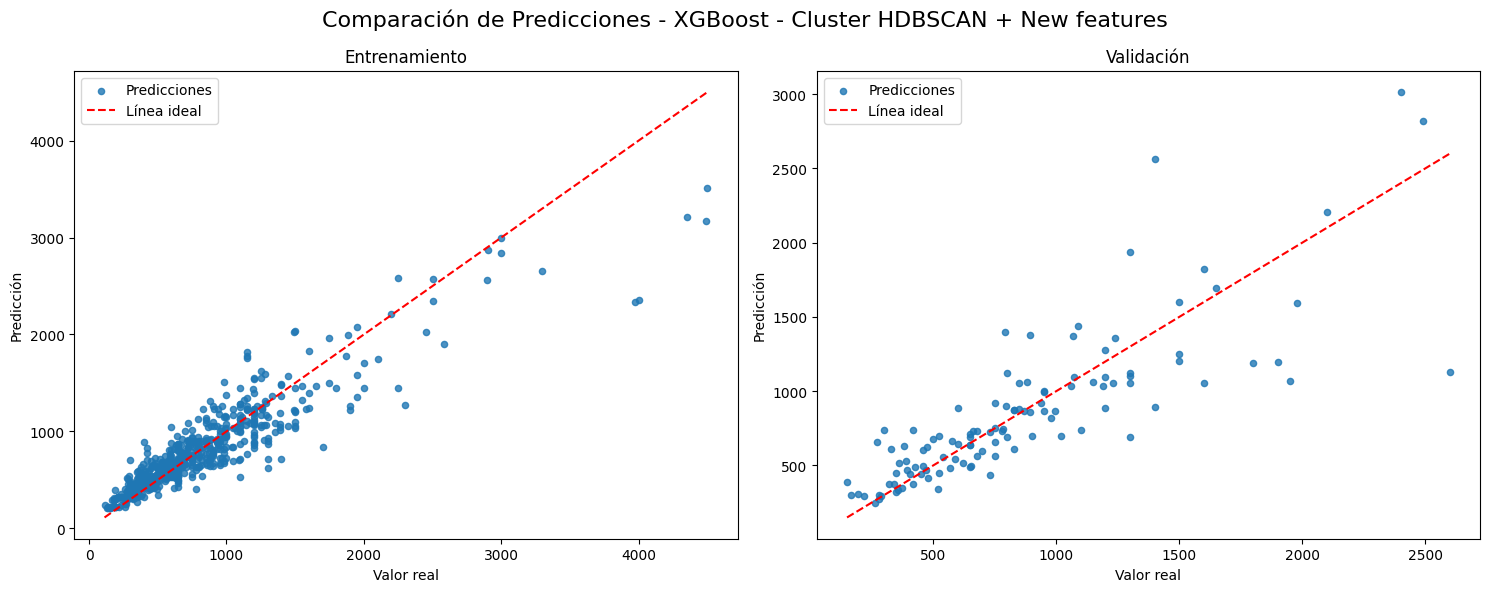

In [304]:
model_evaluation(best_xgb, df_hdb_newf_train, df_hdb_newf_valid, 'XGBoost - Cluster HDBSCAN + New features')

## Prueba con datos de test

📊 Evaluación del modelo: XGBoost - Cluster HDBSCAN + New features
Dataset de Entrenamiento
RMSE: 232.33
MAE: 148.69
Dataset de Validación
RMSE: 222.90
MAE: 148.37


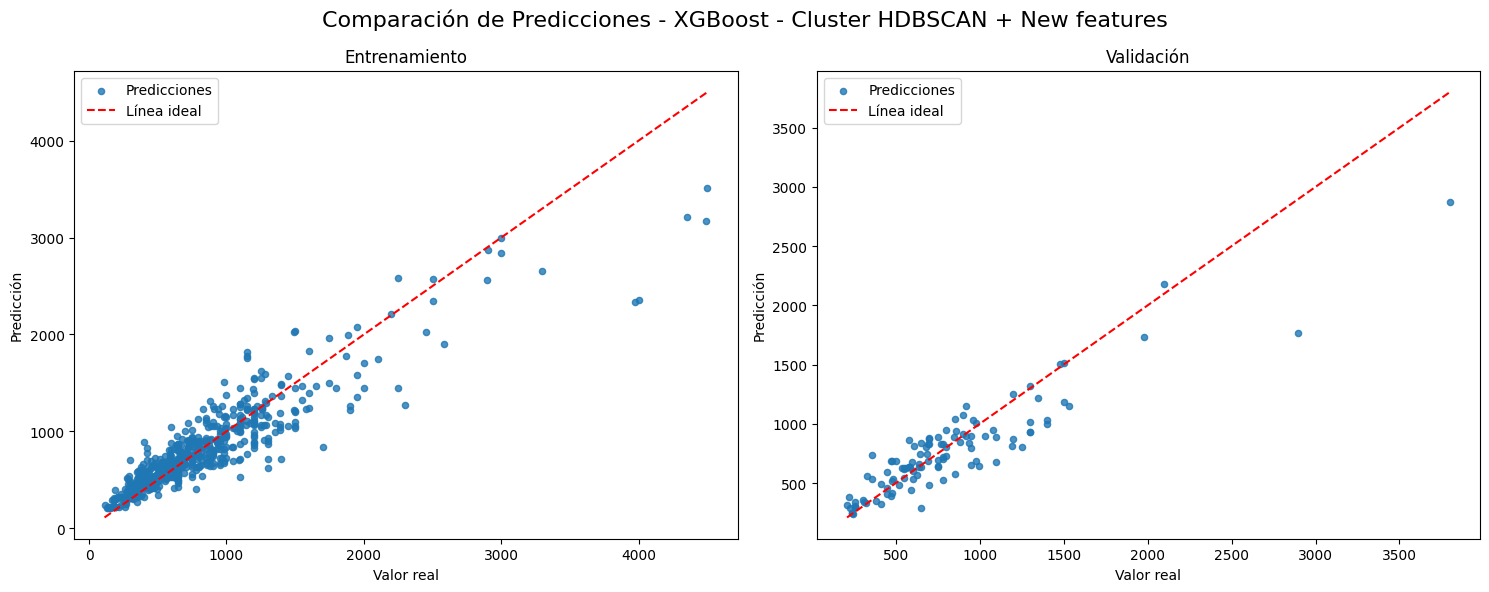

In [305]:
model_evaluation(best_xgb, df_hdb_newf_train, df_hdb_newf_test, 'XGBoost - Cluster HDBSCAN + New features')

In [306]:
sample = df_test_new_features_removed.sample(10, random_state=31)
f_test, t_test = features_target_split(sample)
predictions_test = best_xgb.predict(f_test)

data_prediction_sample = {
    'real': sample['fixed_price'],
    'prediction': predictions_test,
    'residual': predictions_test - sample['fixed_price']
}
answer = pd.DataFrame(data_prediction_sample)
answer

real   prediction    residual
134  1478.0  1508.704224   30.704224
181   920.0  1148.889893  228.889893
73    650.0   740.028015   90.028015
316   310.0   341.441406   31.441406
33   1420.0   693.779602 -726.220398
602  2220.0  1555.452271 -664.547729
970   850.0   577.624878 -272.375122
661  1350.0   815.727051 -534.272949
167   957.0   698.060364 -258.939636
853  1190.0   810.028992 -379.971008